## OBJETIVO:

Se propone predecir mediante ML si una persona puede superar un cierto ingreso anual o no.
En este análisis el resultado presenta solo 2 opciones, siendo la variable categórica y dicotómica.['<50k' ; '>50k']
El dataset propuesto ya cuente con información de la variable a predecir.
En este escenario el MODELO propuesto es de CLASIFICACIÓN.

Asimismo, las categorías existentes del datasets nos permiten poder trabajar con algunas relaciones e intentar establecer si existe algun tipo de correlación más alta entre algunas de estas con otras variables ademas de la variable objetivo.

Para este tipo de análisis se puede utilizar el método de Hipótesis nula, en dónde proponemos una conclusión a la que debemos rechazar, por ejemplo:

* Las mujeres tienen ingrresos significativamente más bajos que los hombre
* Las persinas que trabajan menos horas tienen ingresos significativamente más bajos
* Las personas de raza ' Amer-Indian-Eskimo' tienen ingresos mas bajos
* Las personas de america latina tienen ingresos menores
* Las personas con mayores niveles de educación alcanzados son mayormente casados

Las condiciones de rechazo, se establecen a partir de un humbral de confiabibilidad, en donde se observa que la condicion de la Hipótesis nula queda por fuera del nivel de confiaza, esta es rechazada - indicando que no hay información suficiente en la muestra (o dataset) que permita validar la hipótesis planteada.

Para una primera aproximación, con un análisis bivariado mediante una gráfica de mapa de puntos (scatter plot) se prodría visualizar si existe algún tipo de relación.


## Interes por análisis del dataset con un método no supervisado [Parte II]

Se prodría analizar el DataSet sin el valor de la etiqueta, analizar mediante un sistema no supervisado y analizar mediate el método k-mains y el método de codos si el posible detetar más categorías.


# Cargo las librerias que voy a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 1.- Leo el dataset (archivo.csv)
* Me fijo si se lee bien con los primeros 3 registros

In [2]:
df = pd.read_csv('dataset.csv')
df.head(3)

Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   

       marital-status         occupation   relationship   race   sex  \
0       Never-married       Adm-clerical  Not-in-family  White  Male   
1  Married-civ-spouse    Exec-managerial        Husband  White  Male   
2            Divorced  Handlers-cleaners  Not-in-family  White  Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K

# 2.- Analisis exploratorio de datos (EDA)

## 2.1.- Acercamiento al dataset

### Pruebo con el método info()
Resumen del dataset luego de la carga

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
 15  income          48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


# sigo analizando el tamaño del data set
Determino cunatos registros tiene el dataset y sus campos

In [4]:
df.shape

(48842, 16)

## Analizo los campos numericos media, mediana, min, max y percentiles
Analizo solo los campos que son numéricos para establecer las variaciones, dispersión y demas valores de tendencia central para tener una idea/detalle del campo

In [5]:
df.describe().T

count           mean            std      min        25%  \
Unnamed: 0      48842.0   24420.500000   14099.615261      0.0   12210.25   
age             48842.0      38.643585      13.710510     17.0      28.00   
fnlwgt          48842.0  189664.134597  105604.025423  12285.0  117550.50   
education-num   48842.0      10.078089       2.570973      1.0       9.00   
capital-gain    48842.0    1079.067626    7452.019058      0.0       0.00   
capital-loss    48842.0      87.502314     403.004552      0.0       0.00   
hours-per-week  48842.0      40.422382      12.391444      1.0      40.00   

                     50%        75%        max  
Unnamed: 0       24420.5   36630.75    48841.0  
age                 37.0      48.00       90.0  
fnlwgt          178144.5  237642.00  1490400.0  
education-num       10.0      12.00       16.0  
capital-gain         0.0       0.00    99999.0  
capital-loss         0.0       0.00     4356.0  
hours-per-week      40.0      45.00       99.0

## Veo los campos disponibles
Listo todos los nombres de las columnas

In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

## Consulto por lo tipos de datos de los campos del dataset...
Veo que tipo de datos tiene cada campos del dataset

In [7]:
df.dtypes

Unnamed: 0         int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


## Modelo de ML de clasificación o supervisado en donde ya se encuentra dentro del data set una muestra del universo de ingresos con datos de la variable
## El objetivo es encontrar un modelo a partir de un entrenamiento (FIT) basado en una fracción del dataset para luego realizar una prueba (TEST) del modelo para obtener una buena predicción y así poder realizar predicciones para futuros casos

## **Distribución de la variable dependiente **
### Vamos a conocer como es la variable a determinar

<Axes: xlabel='income'>

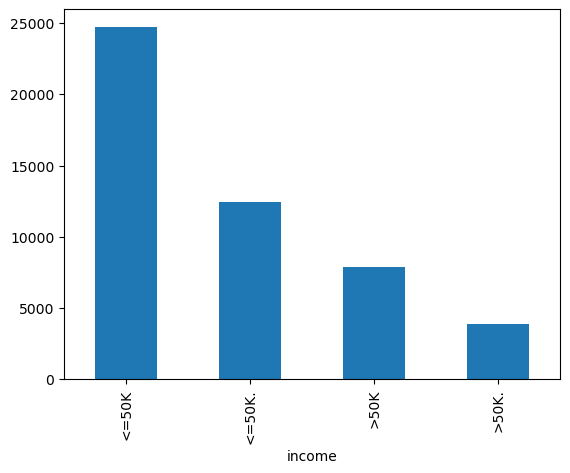

In [8]:
df['income'].value_counts().plot(kind='bar')

# Diccionario de campos y variables

* age numerico entero - puedo analizar la distribución de rango etarios de la población del dataset (74 categorias de edad)
* workclass: string (8 categorias) hay un valor no definido 
* fnlwgt: 
* education: string (16 categorias)
* education-num: numerico entero
* marital-status: string (7 categorias)
* occupation: string (15 categorias)
* relationship: string (6 categorias)
* race: string (6 categorias)
* sex: string (2 categorias)
* capital-gain:
* capital-loss:
* hours-per-week:
* native-country:
* income:

# 2.2.- Exploración y Limpieza de datos

##### Manupulación de datos, vistas, formatos, automatización de ETL

##### Detección de nulos, detección de duplicados, detección de outliers

##### Determinacion de métodos de rellenados/reemplazo/eliminación (cuantitativo - cualitativo/categórico)

##### Creación de nuevos campos - categorias

In [9]:
df.head()

Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   
3           3   53           Private  234721       11th              7   
4           4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

### Elimino la columna 'Unnamed:0'
#### sobre el mismo dataframe

In [10]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

<Axes: xlabel='education-num', ylabel='education'>

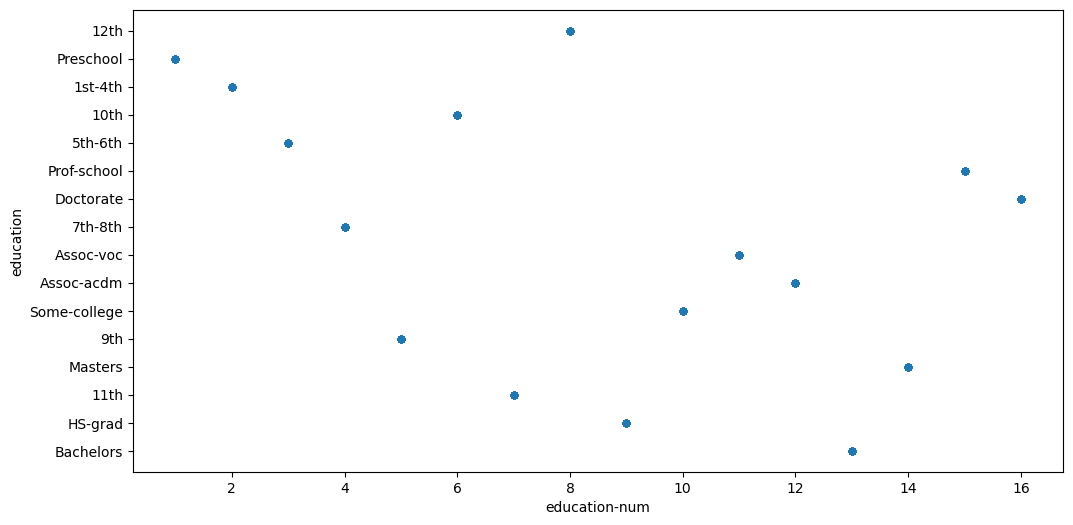

In [11]:
df.plot(kind="scatter",     # Create a scatterplot
              x='education-num',          # Put carat on the x axis
              y='education',          # Put price on the y axis
              figsize=(12,6))

### Acá vemos que hay una relación biunívoca (biyectiva) entre 'education' y 'education-num'
### es decir representan lo mismo, este valor esta duplicado y no aporta valor al dataset
### se propone eliminar

In [12]:
df.drop('education-num', axis=1,inplace=True)
df.head()

age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

In [13]:
df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [14]:
df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

## los campos de 'capital-gain' y 'capital-loss' tienen la mayor parte de los registros cargados con valor '0'
## no aportan nada concluyente - propongo eliminarlos

In [15]:
df.drop('capital-gain', axis=1,inplace=True)
df.drop('capital-loss', axis=1,inplace=True)
df.head()

age         workclass  fnlwgt  education      marital-status  \
0   39         State-gov   77516  Bachelors       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors  Married-civ-spouse   
2   38           Private  215646    HS-grad            Divorced   
3   53           Private  234721       11th  Married-civ-spouse   
4   28           Private  338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K

### 2.2.1.- MANEJO DE NULOS Y CARACTERES ESPECIALES

 #### Uso de la librería missigno

In [16]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import missingno as msno

<Axes: >

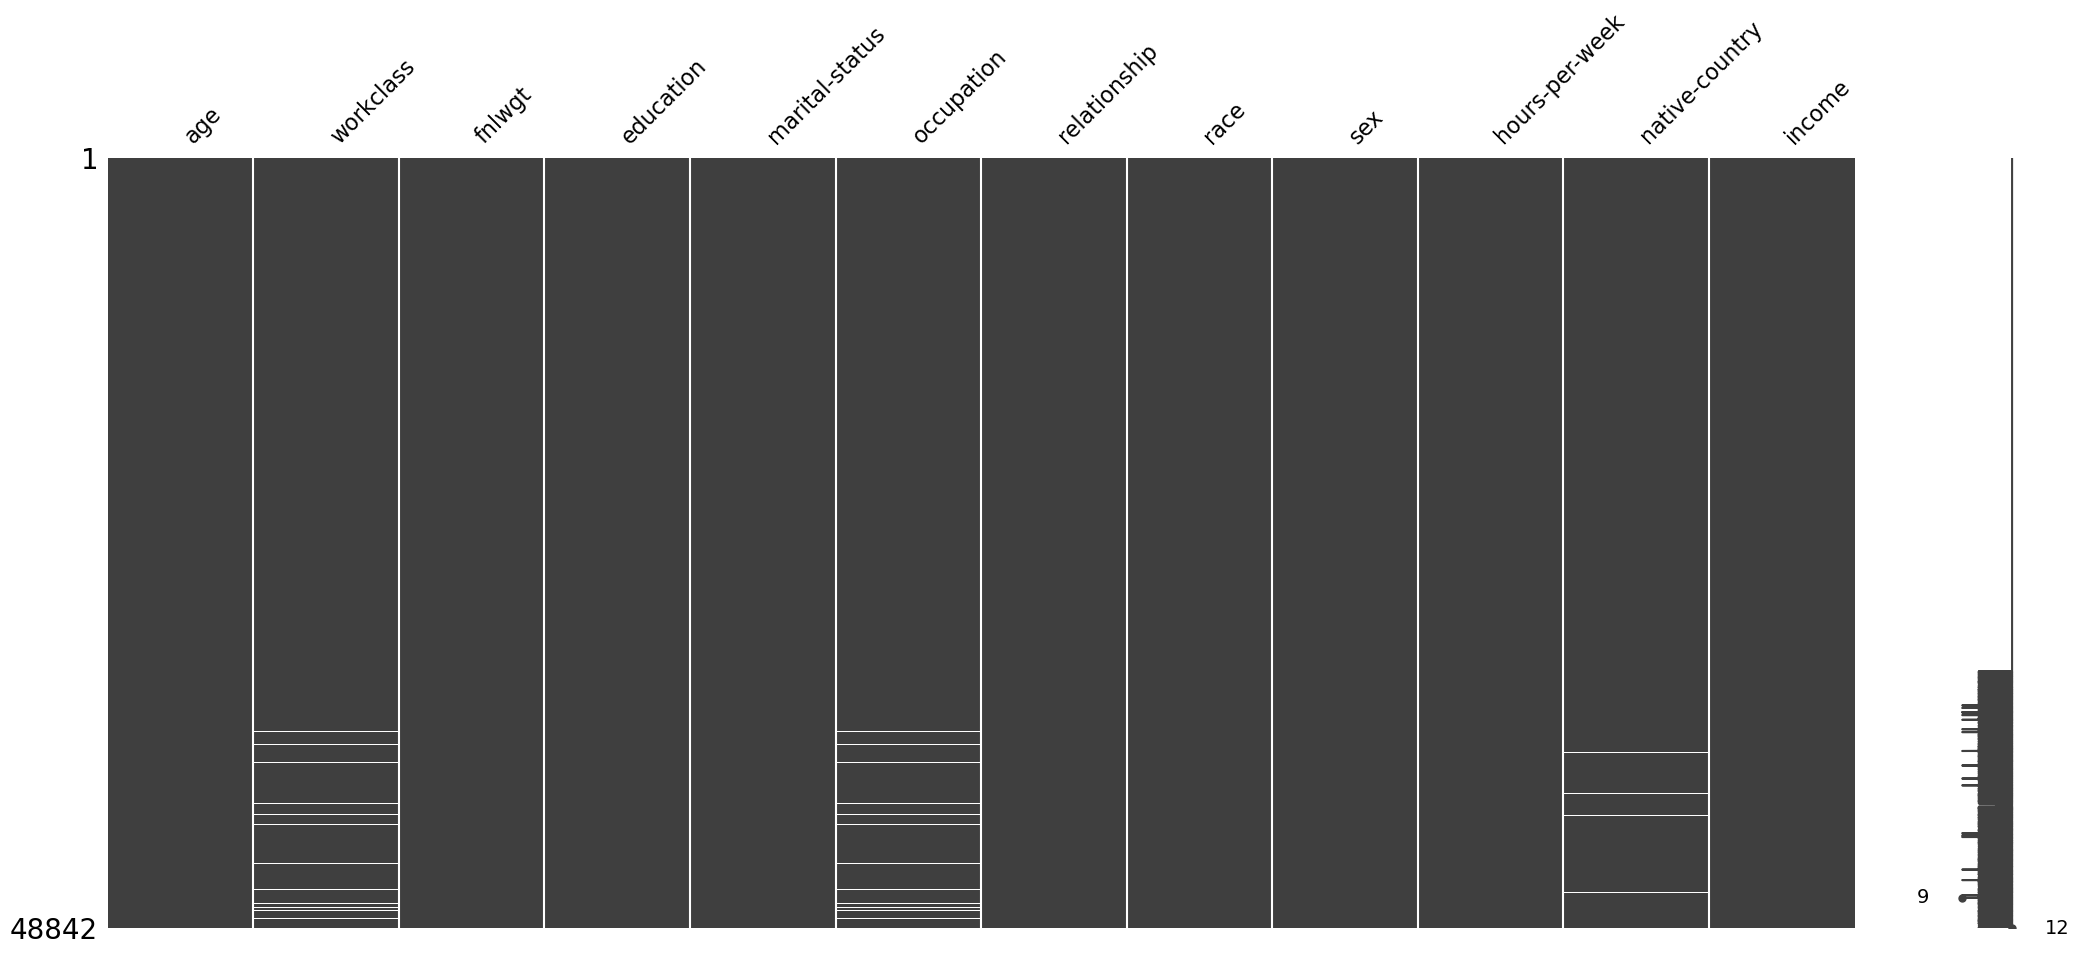

In [18]:
msno.matrix(df)

### Veo 3 columnas con valores nulos
### vamos a realizar un primer análisis de cada una

<Axes: xlabel='workclass'>

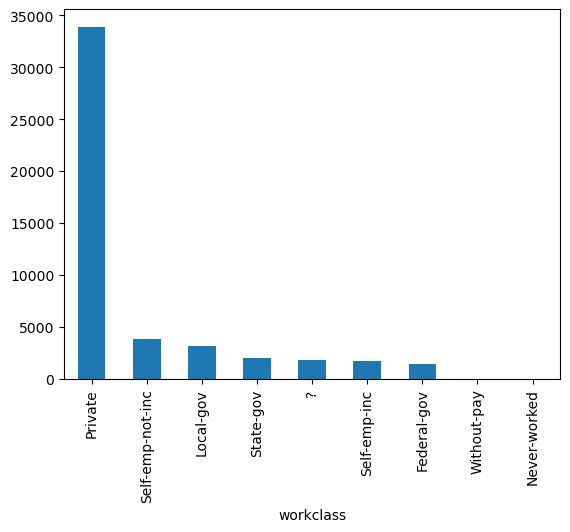

In [19]:
df['workclass'].value_counts().plot(kind='bar')

## Se observa que hay registros en el dataset 'workclass' con signo '?'
## Se debe analizar rellenado

<Axes: xlabel='occupation'>

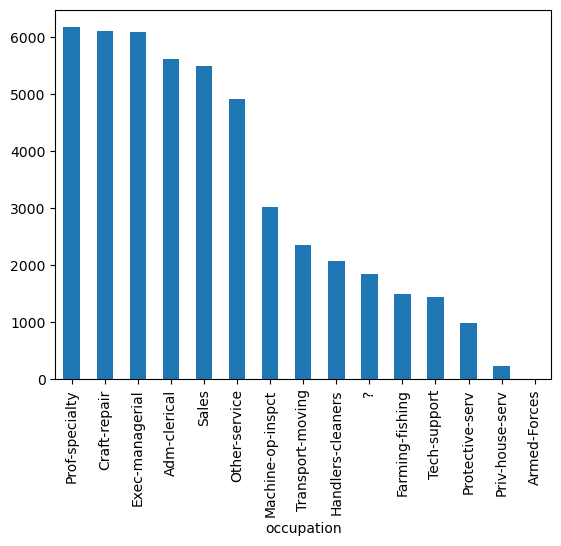

In [20]:
df['occupation'].value_counts().plot(kind='bar')

## Se observa que hay registros en el dataset 'occupation' con signo '?'
## Se debe analizar rellenado

<Axes: xlabel='native-country'>

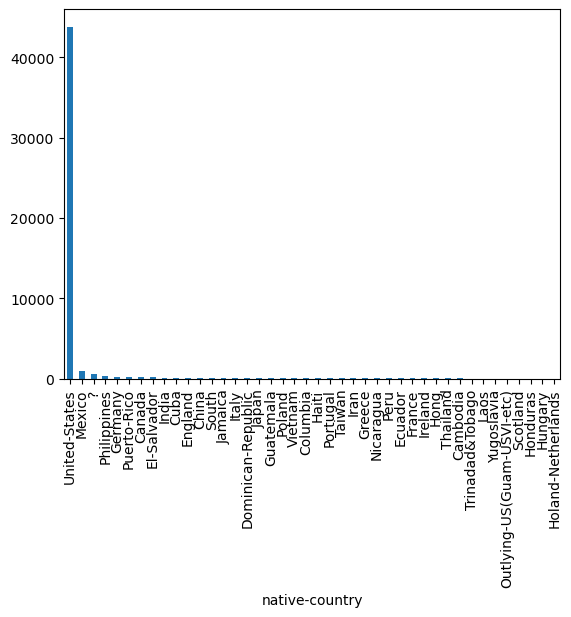

In [21]:
df['native-country'].value_counts().plot(kind='bar')

## Se observa que hay registros en el dataset 'native-country' con signo '?'
## Se debe analizar rellenado

In [22]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    274
income              0
dtype: int64

## vamos a limpiar los registros '?'

In [23]:
pd.crosstab(index=df['occupation'],columns=df['workclass'])

workclass             ?  Federal-gov  Local-gov  Never-worked  Private  \
occupation                                                               
?                  1836            0          0             7        0   
Adm-clerical          0          487        421             0     4208   
Armed-Forces          0           15          0             0        0   
Craft-repair          0           93        211             0     4748   
Exec-managerial       0          268        331             0     3995   
Farming-fishing       0            9         43             0      670   
Handlers-cleaners     0           36         65             0     1923   
Machine-op-inspct     0           19         24             0     2882   
Other-service         0           55        300             0     4057   
Priv-house-serv       0            0          0             0      242   
Prof-specialty        0          253       1061             0     3409   
Protective-serv       0           47        450             0      299   
Sales                 0           17         16             0     4439   
Tech-support          0           96         58             0     1154   
Transport-moving      0           37        156             0     1880   

workclass          Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  
occupation                                                                 
?                             0                 0          0            0  
Adm-clerical                 47                70        375            3  
Armed-Forces                  0                 0          0            0  
Craft-repair                167               798         94            1  
Exec-managerial             617               587        287            1  
Farming-fishing              82               653         25            8  
Handlers-cleaners             6                21         19            2  
Machine-op-inspct            17                59         19            2  
Other-service                42               276        191            2  
Priv-house-serv               0                 0          0            0  
Prof-specialty              245               575        629            0  
Protective-serv               5                 7        175            0  
Sales                       420               591         20            1  
Tech-support                  9                42         87            0  
Transport-moving             38               183         60            1

### Si elimino los registros que tengan '?' limpio el datasets
### Si elimino por el campo ' occupation' elimino la categiría 'Never-worked'
### Total son 1843 registros sobre 48842

In [24]:
indices_borrar = df[df['occupation'] == '?'].index
df1 = df.drop(indices_borrar)

In [25]:
df1['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [26]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64

In [27]:
df1.shape

(46999, 12)

In [28]:
df1.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    274
income              0
dtype: int64

##### También parece que tienen la misma distribución de campos nulos
##### Vamos a verificarlo

In [29]:
#total de nulos en 'occupation'
df1['occupation'].isna().sum()

966

In [30]:
df1['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [31]:
#total de nulos en 'workclass'
df1['workclass'].isna().sum()

963

In [32]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64

In [33]:
df1.loc[df1['workclass'].isna()][['workclass','occupation','native-country']].count()

workclass           0
occupation          0
native-country    944
dtype: int64

### Todos nan de 'workclass' son nan en 'occupation'

In [34]:
indice_nulos = df1[df1['workclass'].isna()].index
df1.drop(indice_nulos,inplace=True)
df1.shape

(46036, 12)

In [35]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          3
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

In [36]:
df1[df1['occupation'].isna()]

age     workclass  fnlwgt education         marital-status occupation  \
41346   17  Never-worked  131593      11th          Never-married        NaN   
44168   20  Never-worked  273905   HS-grad  Married-spouse-absent        NaN   
46459   18  Never-worked  162908      11th          Never-married        NaN   

         relationship   race     sex  hours-per-week native-country  income  
41346       Own-child  Black  Female              20  United-States  <=50K.  
44168  Other-relative  White    Male              35  United-States  <=50K.  
46459       Own-child  White    Male              35  United-States  <=50K.

### estos 3 registros corresponden a la categoría 'Never-worked'

In [37]:
indice_never_worked = df1[df1['occupation'].isna()].index
df1.drop(indice_never_worked, inplace=True)
df1.shape

(46033, 12)

In [38]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

In [39]:
df1.loc[df1['native-country'].isna()]

age     workclass  fnlwgt     education         marital-status  \
32580   40       Private   85019     Doctorate     Married-civ-spouse   
32626   41       Private  109912     Bachelors          Never-married   
32644   44  Self-emp-inc  223881       HS-grad     Married-civ-spouse   
32749   34     State-gov  513100     Bachelors  Married-spouse-absent   
32814   42   Federal-gov  177937     Bachelors          Never-married   
...    ...           ...     ...           ...                    ...   
48245   46       Private   31411          11th     Married-civ-spouse   
48272   24       Private  127159  Some-college          Never-married   
48604   24     State-gov  161783     Bachelors          Never-married   
48651   34       Private  143776       Masters          Never-married   
48826   50     Local-gov  139347       Masters     Married-civ-spouse   

             occupation    relationship                race     sex  \
32580    Prof-specialty         Husband  Asian-Pac-Islander    Male   
32626     Other-service   Not-in-family               White  Female   
32644      Craft-repair         Husband               White    Male   
32749   Farming-fishing   Not-in-family               Black    Male   
32814    Prof-specialty   Not-in-family               White    Male   
...                 ...             ...                 ...     ...   
48245     Other-service            Wife               White  Female   
48272     Other-service  Other-relative               White  Female   
48604  Transport-moving   Not-in-family               Black    Male   
48651    Prof-specialty   Not-in-family               Black    Male   
48826    Prof-specialty            Wife               White  Female   

       hours-per-week native-country  income  
32580              45            NaN   >50K.  
32626              40            NaN  <=50K.  
32644              50            NaN   >50K.  
32749              40            NaN  <=50K.  
32814              40            NaN  <=50K.  
...               ...            ...     ...  
48245              40            NaN  <=50K.  
48272              24            NaN  <=50K.  
48604              40            NaN  <=50K.  
48651              45            NaN   >50K.  
48826              40            NaN   >50K.  

[255 rows x 12 columns]

## Me quedan estos 255 registros que no tienen 'native-country'
## Tengo que elegir 
### eliminar, rellenar con la moda (usa)

### CONCLUSIONES ELIMINAR NULOS
1.- El objetivo es poder predecir si una persona puede o no ganar más de U$S50k anualmente...
2.- Las personas que nunca trabajaron y participaron son muy pocas...pero es correcto que no hayan aportado ocupación.
3.- En total tenemos casi 49.000 registros
4.- Se observa que se indican horas de trabajo e incluso algunos han indicado ganancias
5.- Existe algún aporte/valor de información asociada a las personas que nunca trabajaron o las que no detallaron su occupación
6.- Es un segmento/muestra de la población válida, es posible inferir que no es suficientemente representativa

Se pueden eliminar los registros que tengan np.nan en los campos 'occupation' y 'workclass'


1.- Hay 1836 registros en los cuales no se informa 'occupation' ni 'workclass'
2.- hay registros que fueron registrados con '?' otros vacíos 'null'/'nan'
3.- Tienen ambos campos una correlación fuerte y se podría eliminar una.
4.- 'workclass' tiene 9 categorias
5.- 'occupation' tiene 15 categorias


### 2.2.2.- DUPLICADOS

In [40]:
df1.duplicated().sum()

31

In [41]:
df1[df1.duplicated()]

age         workclass  fnlwgt     education      marital-status  \
4881    25           Private  308144     Bachelors       Never-married   
5104    90           Private   52386  Some-college       Never-married   
9171    21           Private  250051  Some-college       Never-married   
11631   20           Private  107658  Some-college       Never-married   
13084   25           Private  195994       1st-4th       Never-married   
15059   21           Private  243368     Preschool       Never-married   
17040   46           Private  173243       HS-grad  Married-civ-spouse   
18555   30           Private  144593       HS-grad       Never-married   
18698   19           Private   97261       HS-grad       Never-married   
21318   19           Private  138153  Some-college       Never-married   
21490   19           Private  146679  Some-college       Never-married   
21875   49           Private   31267       7th-8th  Married-civ-spouse   
22300   25           Private  195994       1st-4th       Never-married   
22367   44           Private  367749     Bachelors       Never-married   
22494   49  Self-emp-not-inc   43479  Some-college  Married-civ-spouse   
24819   20           Private  196745  Some-college       Never-married   
25872   23           Private  240137       5th-6th       Never-married   
26313   28           Private  274679       Masters       Never-married   
27929   28           Private  148429       HS-grad  Married-civ-spouse   
28230   27           Private  255582       HS-grad       Never-married   
28522   42           Private  204235  Some-college  Married-civ-spouse   
28846   39           Private   30916       HS-grad  Married-civ-spouse   
29157   38           Private  207202       HS-grad  Married-civ-spouse   
30845   46           Private  133616  Some-college            Divorced   
31993   19           Private  251579  Some-college       Never-married   
32404   35           Private  379959       HS-grad            Divorced   
33425   24           Private  194630     Bachelors       Never-married   
43750   37           Private   52870     Bachelors  Married-civ-spouse   
43773   29           Private   36440     Bachelors       Never-married   
46409   30           Private  180317     Assoc-voc            Divorced   
48521   18      Self-emp-inc  378036          12th       Never-married   

              occupation   relationship                race     sex  \
4881        Craft-repair  Not-in-family               White    Male   
5104       Other-service  Not-in-family  Asian-Pac-Islander    Male   
9171      Prof-specialty      Own-child               White  Female   
11631       Tech-support  Not-in-family               White  Female   
13084    Priv-house-serv  Not-in-family               White  Female   
15059    Farming-fishing  Not-in-family               White    Male   
17040       Craft-repair        Husband               White    Male   
18555      Other-service  Not-in-family               Black    Male   
18698    Farming-fishing  Not-in-family               White    Male   
21318       Adm-clerical      Own-child               White  Female   
21490    Exec-managerial      Own-child               Black    Male   
21875       Craft-repair        Husband               White    Male   
22300    Priv-house-serv  Not-in-family               White  Female   
22367     Prof-specialty  Not-in-family               White  Female   
22494       Craft-repair        Husband               White    Male   
24819      Other-service      Own-child               White  Female   
25872  Handlers-cleaners  Not-in-family               White    Male   
26313     Prof-specialty  Not-in-family               White    Male   
27929  Machine-op-inspct        Husband               White    Male   
28230  Machine-op-inspct  Not-in-family               White  Female   
28522     Prof-specialty        Husband               White    Male   
28846       Craft-repair        Husband               White    Male   
29157

### No observo duplicados - en principio descarto hacer algo con estos registros

# 3.- Análisis storytelling

## 3.1.- Cómo se encuentra distribuida la muestra respecto al sexo?

<Axes: title={'center': 'Distribución por sexo en el dataset'}>

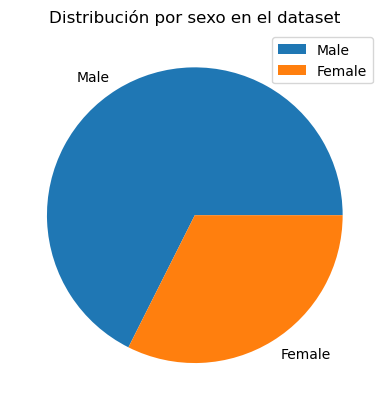

In [42]:
df1['sex'].value_counts().plot(kind='pie', title= 'Distribución por sexo en el dataset',legend=True, ylabel='')

## más registros de hombres que mujeres

## 3.2.- Distribución de acuerdo a la raza

<Axes: xlabel='race'>

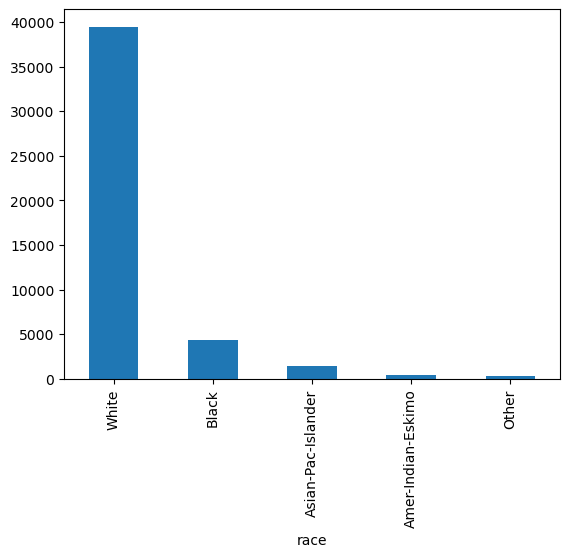

In [43]:
df1['race'].value_counts().plot(kind='bar')

## predominio de raza blanca

## 3.3.- Distribución de acuerdo al nivel de educacion

<Axes: xlabel='education'>

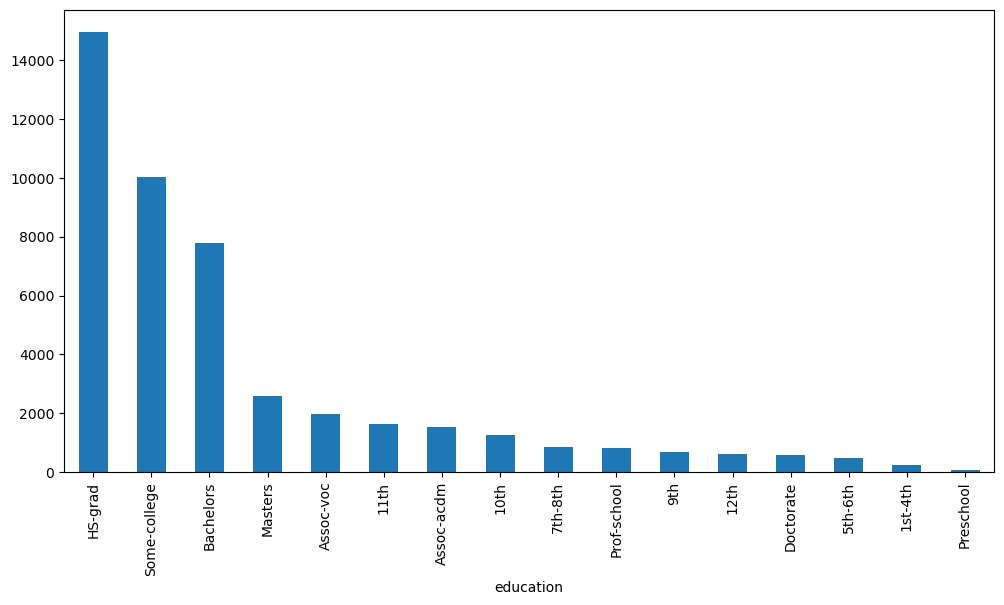

In [44]:
df1['education'].value_counts().plot(kind='bar',figsize=(12,6))

## los primeras 3 categorías sellevan un número mayoritario de registros

## 3.4.- Distribución por relación/vínculo 

<Axes: xlabel='marital-status'>

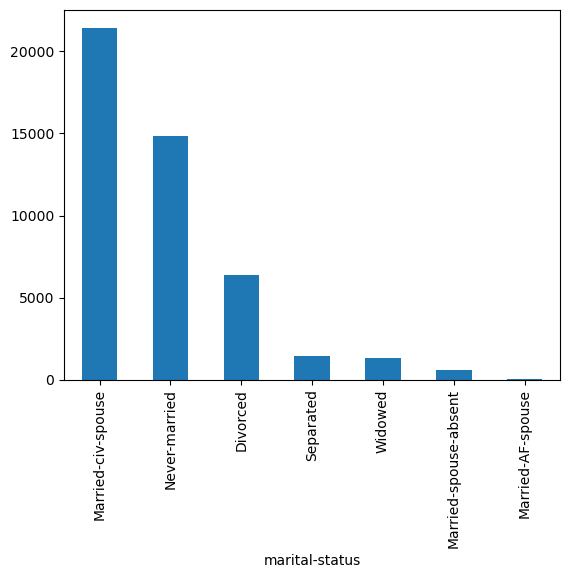

In [45]:
df1['marital-status'].value_counts().plot(kind='bar')

## 3.5.- predomina casados

### Hay 3 categorias que corresponden a Married.
### propongo unificar las categorías a una sola...

In [46]:
df1['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [47]:
df1['marital-status'].nunique()

7

In [48]:
df1['marital-status'] = df1['marital-status'].apply(lambda x: 'Married' if 'Married' in x else x)

In [49]:
df1.head()

age         workclass  fnlwgt  education marital-status         occupation  \
0   39         State-gov   77516  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc   83311  Bachelors        Married    Exec-managerial   
2   38           Private  215646    HS-grad       Divorced  Handlers-cleaners   
3   53           Private  234721       11th        Married  Handlers-cleaners   
4   28           Private  338409  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

In [50]:
df1['marital-status'].nunique()

5

<Axes: xlabel='marital-status'>

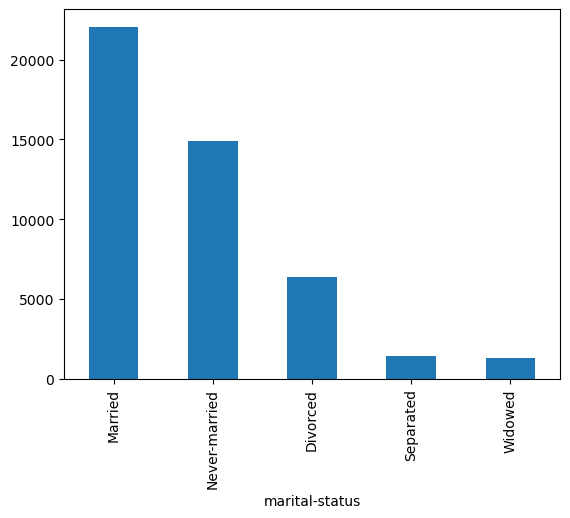

In [51]:
df1['marital-status'].value_counts().plot(kind='bar')

## 3.6.- Distribución de acuerdo al rol dentro de la relación

<Axes: xlabel='relationship'>

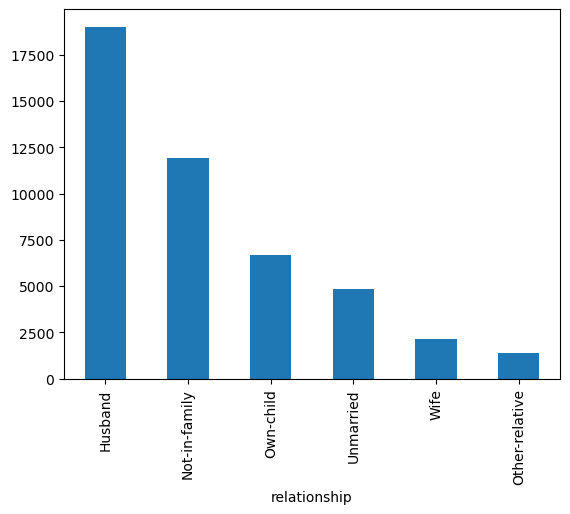

In [52]:
df1['relationship'].value_counts().plot(kind='bar')

### Parece que tiene cierto sentido por el predominio de hombres y estadi civil casado

## 3.7.- Distribución de edades

<Axes: title={'center': 'Distribución edades'}, xlabel='age', ylabel='Ocurrencia'>

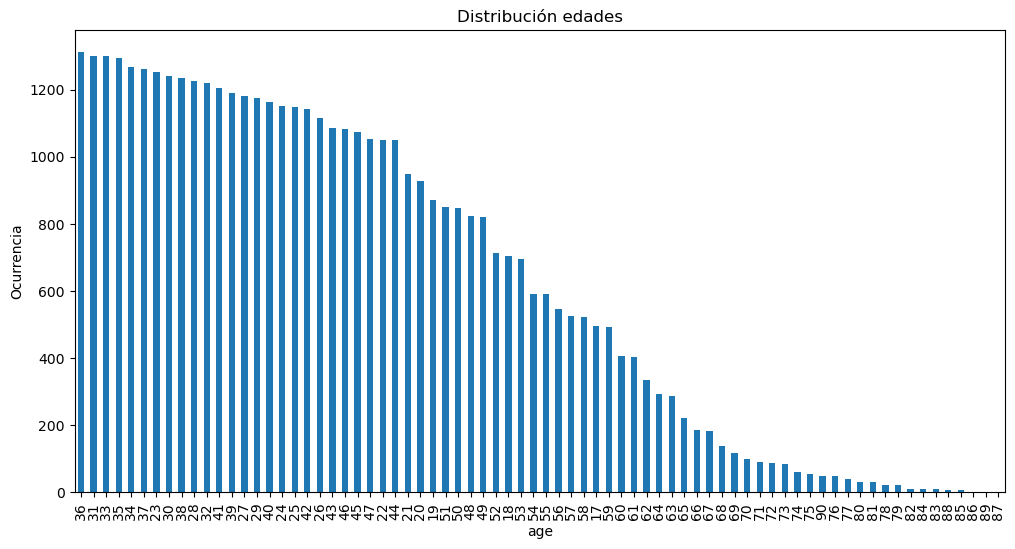

In [53]:
df1['age'].value_counts().plot(kind='bar',figsize=(12,6),title='Distribución edades',ylabel='Ocurrencia')

### para la edad conviene analizar armar binds y armar rango de edades

In [54]:
np.bincount(df1['age'])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  496,  704,  870,  927,  949,
       1050, 1252, 1150, 1149, 1115, 1181, 1225, 1175, 1241, 1300, 1218,
       1299, 1267, 1294, 1312, 1262, 1234, 1189, 1163, 1206, 1143, 1086,
       1050, 1074, 1081, 1053,  823,  820,  846,  849,  714,  695,  590,
        589,  547,  525,  521,  492,  406,  402,  333,  287,  293,  222,
        186,  182,  138,  117,   97,   90,   85,   82,   60,   53,   47,
         39,   21,   20,   29,   29,   10,    9,    9,    5,    1,    1,
          6,    1,   47], dtype=int64)

In [55]:
np.histogram_bin_edges(df1['age'],bins='fd',range=(df1['age'].min(),df1['age'].max()))
#‘fd’ (Freedman Diaconis Estimator)
#'strurges' optimal for gaussian data and underestimates number of bins for large non-gaussian datasets

array([17.        , 18.05797101, 19.11594203, 20.17391304, 21.23188406,
       22.28985507, 23.34782609, 24.4057971 , 25.46376812, 26.52173913,
       27.57971014, 28.63768116, 29.69565217, 30.75362319, 31.8115942 ,
       32.86956522, 33.92753623, 34.98550725, 36.04347826, 37.10144928,
       38.15942029, 39.2173913 , 40.27536232, 41.33333333, 42.39130435,
       43.44927536, 44.50724638, 45.56521739, 46.62318841, 47.68115942,
       48.73913043, 49.79710145, 50.85507246, 51.91304348, 52.97101449,
       54.02898551, 55.08695652, 56.14492754, 57.20289855, 58.26086957,
       59.31884058, 60.37681159, 61.43478261, 62.49275362, 63.55072464,
       64.60869565, 65.66666667, 66.72463768, 67.7826087 , 68.84057971,
       69.89855072, 70.95652174, 72.01449275, 73.07246377, 74.13043478,
       75.1884058 , 76.24637681, 77.30434783, 78.36231884, 79.42028986,
       80.47826087, 81.53623188, 82.5942029 , 83.65217391, 84.71014493,
       85.76811594, 86.82608696, 87.88405797, 88.94202899, 90.  

In [56]:
np.histogram_bin_edges(df1['age'],bins='sturges',range=(df1['age'].min(),df1['age'].max()))

array([17.        , 21.29411765, 25.58823529, 29.88235294, 34.17647059,
       38.47058824, 42.76470588, 47.05882353, 51.35294118, 55.64705882,
       59.94117647, 64.23529412, 68.52941176, 72.82352941, 77.11764706,
       81.41176471, 85.70588235, 90.        ])

In [57]:
hist,bin_edges = np.histogram(df1['age'])
print(hist)
print(bin_edges)

[7398 8386 8886 8992 5800 3670 2043  584  195   79]
[17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1 75.4 82.7 90. ]


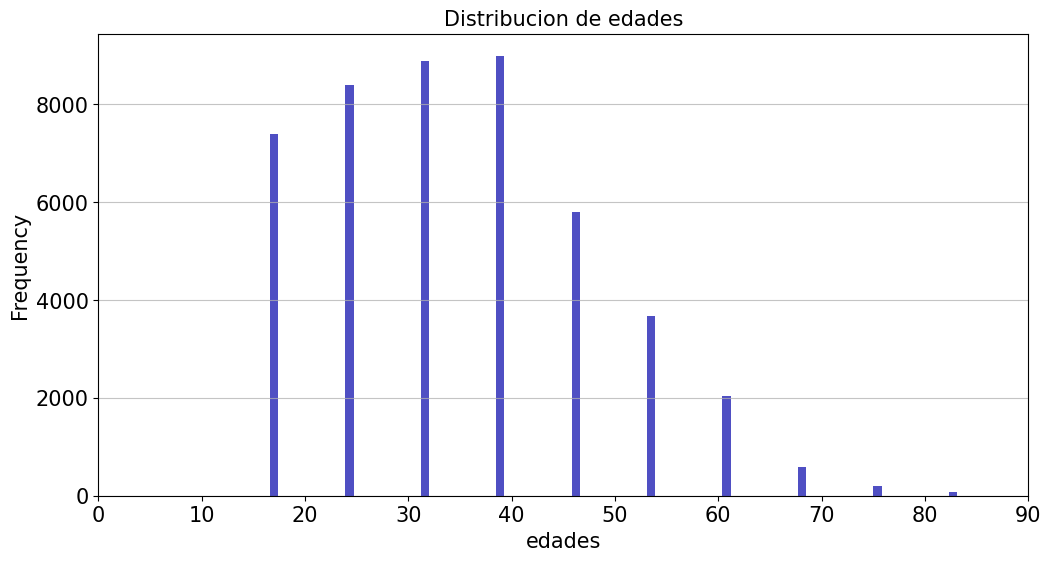

In [58]:
plt.figure(figsize=[12,6])

plt.bar(bin_edges[:-1], hist, color='#0504aa',alpha=0.7) #, width = 0.5
plt.xlim(0, max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('edades',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribucion de edades',fontsize=15)
plt.show()

## 3.8.- Distribución de clases de trabajo

<Axes: title={'center': 'Distribución clases de trabajos'}, xlabel='workclass', ylabel='Ocurrencia'>

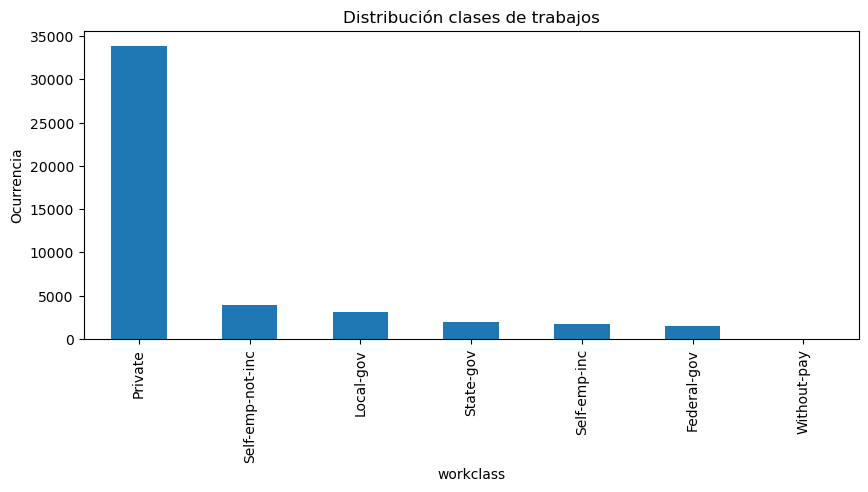

In [59]:
df1['workclass'].value_counts().plot(kind='bar',figsize=(10,4),title='Distribución clases de trabajos',ylabel='Ocurrencia')

### El sector privado es el sector que más requiere de trabajadores

# 4.- Data wrangling


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   fnlwgt          46033 non-null  int64 
 3   education       46033 non-null  object
 4   marital-status  46033 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   race            46033 non-null  object
 8   sex             46033 non-null  object
 9   hours-per-week  46033 non-null  int64 
 10  native-country  45778 non-null  object
 11  income          46033 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.6+ MB


## 4.1.- Reviso que campos tienen NaN y su cantidad

In [61]:
df1.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
hours-per-week      0
native-country    255
income              0
dtype: int64

### Hay que analizar 'Native-country' que tiene 255 registros con nan

In [62]:
df1.shape

(46033, 12)

In [63]:
sum(df1.isna().sum())

255

In [64]:
df1[df1['native-country'].isna()]

age     workclass  fnlwgt     education marital-status  \
32580   40       Private   85019     Doctorate        Married   
32626   41       Private  109912     Bachelors  Never-married   
32644   44  Self-emp-inc  223881       HS-grad        Married   
32749   34     State-gov  513100     Bachelors        Married   
32814   42   Federal-gov  177937     Bachelors  Never-married   
...    ...           ...     ...           ...            ...   
48245   46       Private   31411          11th        Married   
48272   24       Private  127159  Some-college  Never-married   
48604   24     State-gov  161783     Bachelors  Never-married   
48651   34       Private  143776       Masters  Never-married   
48826   50     Local-gov  139347       Masters        Married   

             occupation    relationship                race     sex  \
32580    Prof-specialty         Husband  Asian-Pac-Islander    Male   
32626     Other-service   Not-in-family               White  Female   
32644      Craft-repair         Husband               White    Male   
32749   Farming-fishing   Not-in-family               Black    Male   
32814    Prof-specialty   Not-in-family               White    Male   
...                 ...             ...                 ...     ...   
48245     Other-service            Wife               White  Female   
48272     Other-service  Other-relative               White  Female   
48604  Transport-moving   Not-in-family               Black    Male   
48651    Prof-specialty   Not-in-family               Black    Male   
48826    Prof-specialty            Wife               White  Female   

       hours-per-week native-country  income  
32580              45            NaN   >50K.  
32626              40            NaN  <=50K.  
32644              50            NaN   >50K.  
32749              40            NaN  <=50K.  
32814              40            NaN  <=50K.  
...               ...            ...     ...  
48245              40            NaN  <=50K.  
48272              24            NaN  <=50K.  
48604              40            NaN  <=50K.  
48651              45            NaN   >50K.  
48826              40            NaN   >50K.  

[255 rows x 12 columns]

In [65]:
moda_nacionalidad=df1['native-country'].mode()[0]
moda_nacionalidad

'United-States'

In [66]:
df1['native-country'].value_counts()

native-country
United-States                 41292
Mexico                          903
?                               556
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru         

### Me encontré con 556 registros '?' en la columna 'native-country'!!!

In [67]:
df1[df1['native-country'] == '?']

age         workclass  fnlwgt     education marital-status  \
14      40           Private  121772     Assoc-voc        Married   
38      31           Private   84154  Some-college        Married   
51      18           Private  226956       HS-grad  Never-married   
93      30           Private  117747       HS-grad        Married   
245     56           Private  203580       HS-grad        Married   
...    ...               ...     ...           ...            ...   
32413   45           Private  199590       5th-6th        Married   
32449   44      Self-emp-inc   71556       Masters        Married   
32469   58      Self-emp-inc  181974     Doctorate  Never-married   
32492   42  Self-emp-not-inc  217597       HS-grad       Divorced   
32510   39           Private  107302       HS-grad        Married   

              occupation   relationship                race     sex  \
14          Craft-repair        Husband  Asian-Pac-Islander    Male   
38                 Sales        Husband               White    Male   
51         Other-service      Own-child               White  Female   
93                 Sales           Wife  Asian-Pac-Islander  Female   
245         Adm-clerical        Husband               White    Male   
...                  ...            ...                 ...     ...   
32413  Machine-op-inspct        Husband               White    Male   
32449              Sales        Husband               White    Male   
32469     Prof-specialty  Not-in-family               White  Female   
32492              Sales      Own-child               White    Male   
32510     Prof-specialty        Husband               White    Male   

       hours-per-week native-country income  
14                 40              ?   >50K  
38                 38              ?   >50K  
51                 30              ?  <=50K  
93                 35              ?  <=50K  
245                35              ?  <=50K  
...               ...            ...    ...  
32413              40              ?  <=50K  
32449              50              ?   >50K  
32469              99              ?  <=50K  
32492              50              ?  <=50K  
32510              45              ?   >50K  

[556 rows x 12 columns]

In [68]:
df1['native-country'].fillna(value=moda_nacionalidad,inplace=True)

In [69]:
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [70]:
df1.replace(to_replace='?',value=moda_nacionalidad,inplace=True)
df1['native-country'].value_counts()

native-country
United-States                 42103
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [71]:
df1.describe(include='all').T

count unique             top   freq           mean  \
age             46033.0    NaN             NaN    NaN      38.556601   
workclass         46033      7         Private  33906            NaN   
fnlwgt          46033.0    NaN             NaN    NaN  189805.122803   
education         46033     16         HS-grad  14972            NaN   
marital-status    46033      5         Married  22066            NaN   
occupation        46033     14  Prof-specialty   6172            NaN   
relationship      46033      6         Husband  19005            NaN   
race              46033      5           White  39444            NaN   
sex               46033      2            Male  31114            NaN   
hours-per-week  46033.0    NaN             NaN    NaN      40.948407   
native-country    46033     41   United-States  42103            NaN   
income            46033      4           <=50K  23068            NaN   

                          std      min       25%       50%       75%  \
age                 13.204268     17.0      28.0      37.0      47.0   
workclass                 NaN      NaN       NaN       NaN       NaN   
fnlwgt          105474.732488  13492.0  117606.0  178353.0  237865.0   
education                 NaN      NaN       NaN       NaN       NaN   
marital-status            NaN      NaN       NaN       NaN       NaN   
occupation                NaN      NaN       NaN       NaN       NaN   
relationship              NaN      NaN       NaN       NaN       NaN   
race                      NaN      NaN       NaN       NaN       NaN   
sex                       NaN      NaN       NaN       NaN       NaN   
hours-per-week      12.011069      1.0      40.0      40.0      45.0   
native-country            NaN      NaN       NaN       NaN       NaN   
income                    NaN      NaN       NaN       NaN       NaN   

                      max  
age                  90.0  
workclass             NaN  
fnlwgt          1490400.0  
education             NaN  
marital-status        NaN  
occupation            NaN  
relationship          NaN  
race                  NaN  
sex                   NaN  
hours-per-week       99.0  
native-country        NaN  
income                NaN

In [72]:
df1.head()

age         workclass  fnlwgt  education marital-status         occupation  \
0   39         State-gov   77516  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc   83311  Bachelors        Married    Exec-managerial   
2   38           Private  215646    HS-grad       Divorced  Handlers-cleaners   
3   53           Private  234721       11th        Married  Handlers-cleaners   
4   28           Private  338409  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   fnlwgt          46033 non-null  int64 
 3   education       46033 non-null  object
 4   marital-status  46033 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   race            46033 non-null  object
 8   sex             46033 non-null  object
 9   hours-per-week  46033 non-null  int64 
 10  native-country  46033 non-null  object
 11  income          46033 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.6+ MB


## 4.2.- Análisis de OUTLIERS para los campos numéricos

<Axes: >

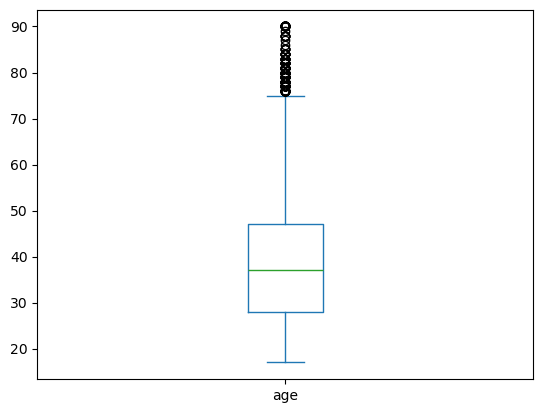

In [74]:
df1['age'].plot(kind='box')

In [75]:
q4_edad = np.percentile(df1['age'],95)
q1_edad = np.percentile(df1['age'],5)
print('Analisis intercuartil para edad')
print(f'percentile q4 es:', q4_edad)
print(f'percentile q1 es:', q1_edad)

Analisis intercuartil para edad
percentile q4 es: 62.0
percentile q1 es: 20.0


In [76]:
df1['age'][df1['age'] > q4_edad].count()

2166

### tenemos 2166 registros con personas que estan con edades superiores al cuartil 95 (cola superior)
#### esto podría indicar un problema social respecto a la clase pasiva...

<Axes: >

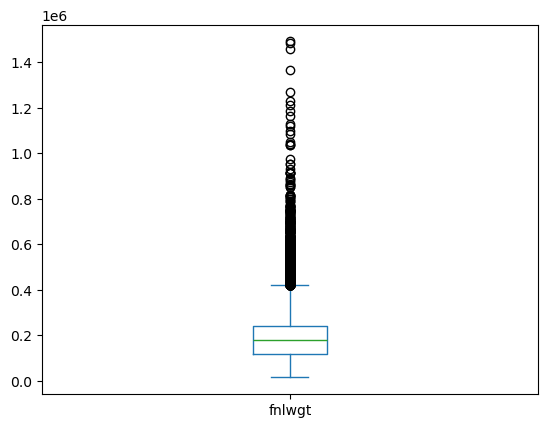

In [77]:
df1['fnlwgt'].plot(kind='box')

In [78]:
q4_fnlwgt = np.percentile(df1['fnlwgt'],95)
q1_fnlwgt = np.percentile(df1['fnlwgt'],5)
print('Analisis intercuartil para fnlwgt')
print(f'percentile q4 es:', q4_fnlwgt)
print(f'percentile q1 es:', q1_fnlwgt)

Analisis intercuartil para fnlwgt
percentile q4 es: 379412.0
percentile q1 es: 40095.0


### Este campo no se que información puede brindar...es candidato a eliminarse del dataset...

<Axes: >

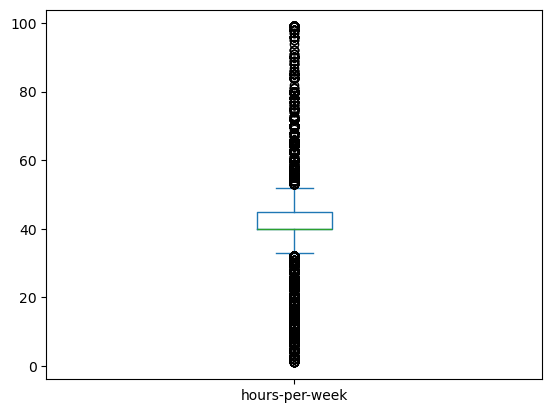

In [79]:
df1['hours-per-week'].plot(kind='box')

In [80]:
q4_horas = np.percentile(df1['hours-per-week'],95)
q1_horas = np.percentile(df1['hours-per-week'],5)
print('Analisis intercuartil para Horas trabajadas por semana')
print(f'percentile q4 es:', q4_horas)
print(f'percentile q1 es:', q1_horas)

Analisis intercuartil para Horas trabajadas por semana
percentile q4 es: 60.0
percentile q1 es: 20.0


In [81]:
df1['hours-per-week'][df1['hours-per-week'].isin([q1_horas,q4_horas])].count()

3752

In [82]:
df_final = df1.drop('fnlwgt',axis=1)
df_final.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

# 5.- Algunos análisis y procesamientos adicionales

from sklearn.preprocessing import OrdinalEncoder
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas.testing

#Clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#regresión
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
df_x = df_final.drop('income',axis=1)
df_y = df_final['income']

In [84]:
df_x.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country  
0  Not-in-family  White    Male              40  United-States  
1        Husband  White    Male              13  United-States  
2  Not-in-family  White    Male              40  United-States  
3        Husband  Black    Male              40  United-States  
4           Wife  Black  Female              40           Cuba

In [85]:
df_y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [86]:
df_y.value_counts()

income
<=50K     23068
<=50K.    11543
>50K       7650
>50K.      3772
Name: count, dtype: int64

#### acá observamos que y tiene 4 categorías por el caracter punto '.'
#### se podrían reducir a 2 que podría mejorar la selección del algoritmo

In [87]:
df_y = df_y.apply(lambda x: '<=50K' if '<=50K.' in x else x)
df_y = df_y.apply(lambda x: '>50K' if '>50K.' in x else x)

In [88]:
df_y.value_counts()

income
<=50K    34611
>50K     11422
Name: count, dtype: int64

In [89]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   workclass       46033 non-null  object
 2   education       46033 non-null  object
 3   marital-status  46033 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    46033 non-null  object
 6   race            46033 non-null  object
 7   sex             46033 non-null  object
 8   hours-per-week  46033 non-null  int64 
 9   native-country  46033 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [90]:
print(df_x.shape,df_y.shape)

(46033, 10) (46033,)


In [91]:
columnas = df_x.select_dtypes(exclude=['int64']).columns
for i in columnas:
    categorias = df_x[i].unique()
    print(f'-------- \n Campo: {i} \n Categorias: {categorias} \n---------\n')

-------- 
 Campo: workclass 
 Categorias: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 
---------

-------- 
 Campo: education 
 Categorias: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 
---------

-------- 
 Campo: marital-status 
 Categorias: ['Never-married' 'Married' 'Divorced' 'Separated' 'Widowed'] 
---------

-------- 
 Campo: occupation 
 Categorias: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 
---------

-------- 
 Campo: relationship 
 Categorias: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 
---------

-------- 
 Campo: race 
 Categorias: ['White' 'Black' 'Asian-Pac-Islander' 'A

### son todas categóricas - debería convenrtirlas a numericas para mejorar el tratamiento ML

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
encoder = OrdinalEncoder()

In [94]:
encoder.fit(df_x)

OrdinalEncoder()

In [95]:
columnas = df_x.select_dtypes(exclude=['int64']).columns
for i in columnas:
    nuevo_campo = 'encoder_'+ i
    df_x[nuevo_campo] = encoder.fit_transform(df_x[[i]])


In [96]:
df_x.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country  \
0  Not-in-family  White    Male              40  United-States   
1        Husband  White    Male              13  United-States   
2  Not-in-family  White    Male              40  United-States   
3        Husband  Black    Male              40  United-States   
4           Wife  Black  Female              40           Cuba   

   encoder_workclass  encoder_education  encoder_marital-status  \
0                5.0                9.0                     2.0   
1                4.0                9.0                     1.0   
2                2.0               11.0                     0.0   
3                2.0                1.0                     1.0   
4                2.0                9.0                     1.0   

   encoder_occupation  encoder_relationship  encoder_race  encoder_sex  \
0                 0.0                   1.0           4.0          1.0   
1                 3.0                   0.0           4.0          1.0   
2                 5.0                   1.0           4.0          1.0   
3                 5.0                   0.0           2.0          1.0   
4                 9.0                   5.0           2.0          0.0   

   encoder_native-country  
0                    38.0  
1                    38.0  
2                    38.0  
3                    38.0  
4                     4.0

In [97]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46033 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     46033 non-null  int64  
 1   workclass               46033 non-null  object 
 2   education               46033 non-null  object 
 3   marital-status          46033 non-null  object 
 4   occupation              46033 non-null  object 
 5   relationship            46033 non-null  object 
 6   race                    46033 non-null  object 
 7   sex                     46033 non-null  object 
 8   hours-per-week          46033 non-null  int64  
 9   native-country          46033 non-null  object 
 10  encoder_workclass       46033 non-null  float64
 11  encoder_education       46033 non-null  float64
 12  encoder_marital-status  46033 non-null  float64
 13  encoder_occupation      46033 non-null  float64
 14  encoder_relationship    46033 non-null  flo

In [98]:
df_x.describe().T

count       mean        std   min   25%   50%   75%  \
age                     46033.0  38.556601  13.204268  17.0  28.0  37.0  47.0   
hours-per-week          46033.0  40.948407  12.011069   1.0  40.0  40.0  45.0   
encoder_workclass       46033.0   2.205201   0.957854   0.0   2.0   2.0   2.0   
encoder_education       46033.0  10.309256   3.813403   0.0   9.0  11.0  12.0   
encoder_marital-status  46033.0   1.331632   0.853993   0.0   1.0   1.0   2.0   
encoder_occupation      46033.0   5.979080   4.023434   0.0   2.0   6.0   9.0   
encoder_relationship    46033.0   1.411965   1.597293   0.0   0.0   1.0   3.0   
encoder_race            46033.0   3.672061   0.841747   0.0   4.0   4.0   4.0   
encoder_sex             46033.0   0.675906   0.468040   0.0   0.0   1.0   1.0   
encoder_native-country  46033.0  36.429192   6.029731   0.0  38.0  38.0  38.0   

                         max  
age                     90.0  
hours-per-week          99.0  
encoder_workclass        6.0  
encoder_education       15.0  
encoder_marital-status   4.0  
encoder_occupation      13.0  
encoder_relationship     5.0  
encoder_race             4.0  
encoder_sex              1.0  
encoder_native-country  40.0

In [99]:
columnas_num = df_x.select_dtypes(exclude=['object']).columns
df_x_num = df_x[columnas_num]
df_x_num.head()

age  hours-per-week  encoder_workclass  encoder_education  \
0   39              40                5.0                9.0   
1   50              13                4.0                9.0   
2   38              40                2.0               11.0   
3   53              40                2.0                1.0   
4   28              40                2.0                9.0   

   encoder_marital-status  encoder_occupation  encoder_relationship  \
0                     2.0                 0.0                   1.0   
1                     1.0                 3.0                   0.0   
2                     0.0                 5.0                   1.0   
3                     1.0                 5.0                   0.0   
4                     1.0                 9.0                   5.0   

   encoder_race  encoder_sex  encoder_native-country  
0           4.0          1.0                    38.0  
1           4.0          1.0                    38.0  
2           4.0          1.0                    38.0  
3           2.0          1.0                    38.0  
4           2.0          0.0                     4.0

<Axes: >

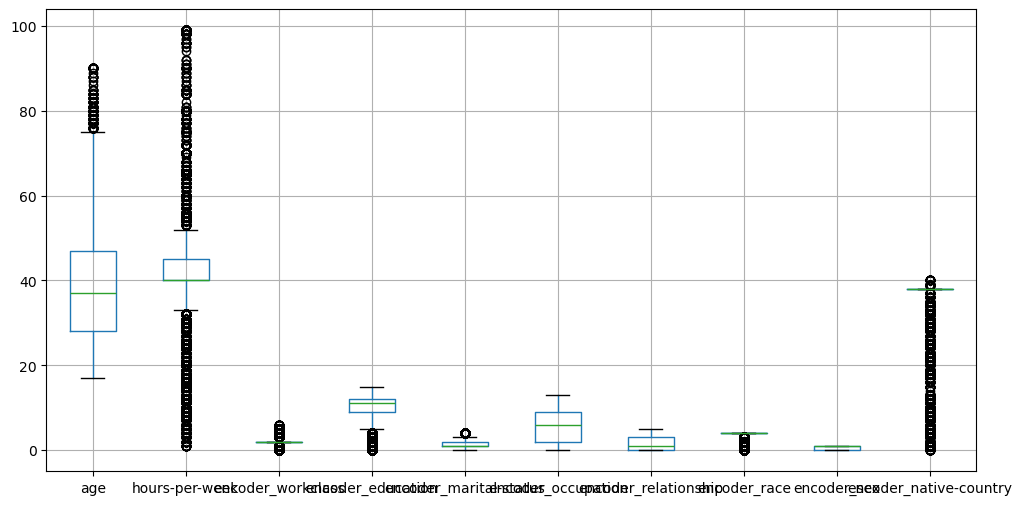

In [100]:
df_x_num.boxplot(figsize=(12,6))

In [101]:
df_x_num.columns

Index(['age', 'hours-per-week', 'encoder_workclass', 'encoder_education',
       'encoder_marital-status', 'encoder_occupation', 'encoder_relationship',
       'encoder_race', 'encoder_sex', 'encoder_native-country'],
      dtype='object')

In [102]:
df_x_num['encoder_workclass'].value_counts()

encoder_workclass
2.0    33906
4.0     3862
1.0     3136
5.0     1981
3.0     1695
0.0     1432
6.0       21
Name: count, dtype: int64

#### en una primera aproximación vemos que no es necesario realizar una normalización. (0 - 100)

### Seguimos teniendo muchos OUTLIERS

## 5.1.- Análisis de correlación

In [103]:
#Pearson Correlation
corr_matrix = df_x_num.corr()

print(corr_matrix)

                             age  hours-per-week  encoder_workclass  \
age                     1.000000        0.102185           0.085414   
hours-per-week          0.102185        1.000000           0.050254   
encoder_workclass       0.085414        0.050254           1.000000   
encoder_education      -0.004881        0.060216           0.017484   
encoder_marital-status -0.188688       -0.176521          -0.032256   
encoder_occupation     -0.005091        0.016093           0.017331   
encoder_relationship   -0.246611       -0.258283          -0.064867   
encoder_race            0.025596        0.041894           0.047925   
encoder_sex             0.081671        0.230204           0.069652   
encoder_native-country -0.002982        0.007706           0.004043   

                        encoder_education  encoder_marital-status  \
age                             -0.004881               -0.188688   
hours-per-week                   0.060216               -0.176521   
encoder_wor

<Axes: >

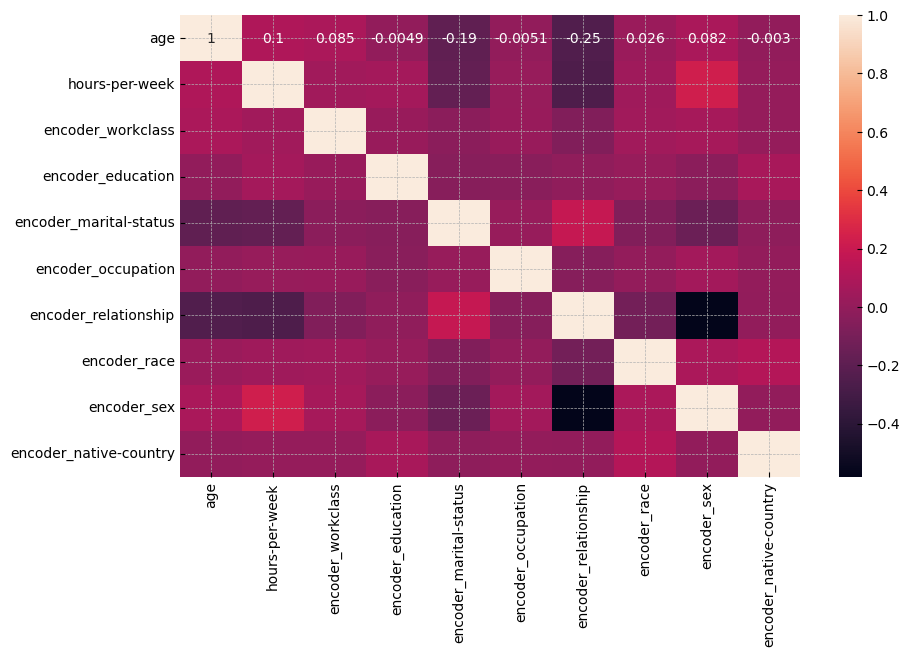

In [104]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_x_num.corr(), annot=True, ax=ax)
#, cmap=sns.cubehelix_palette(as_cmap=True)

### como las variables no son compatibles con distribuciones normales, pruebo la correlación con un método que se ajusta mejor y no se ve afectado por lo outliers

<Axes: >

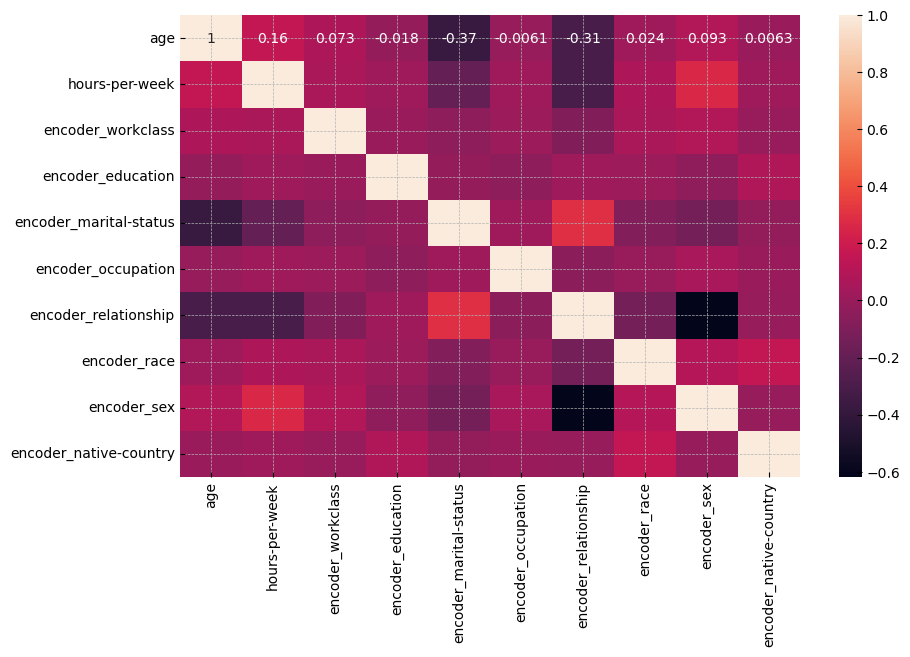

In [105]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_x_num.corr(method='spearman'), annot=True, ax=ax)

### Veo una correlación 'fuerte' [> 0,62]  entre 'sex' y 'relatioship'
### Parecería que tiene más sentido contar con un datos asociado a 'sex' en el dataset que 'relationship'
### Pero sex es dicotómica...[0,1]...no es correcta esta relación

Text(0.5, 1.0, 'Sex vs Relationship')

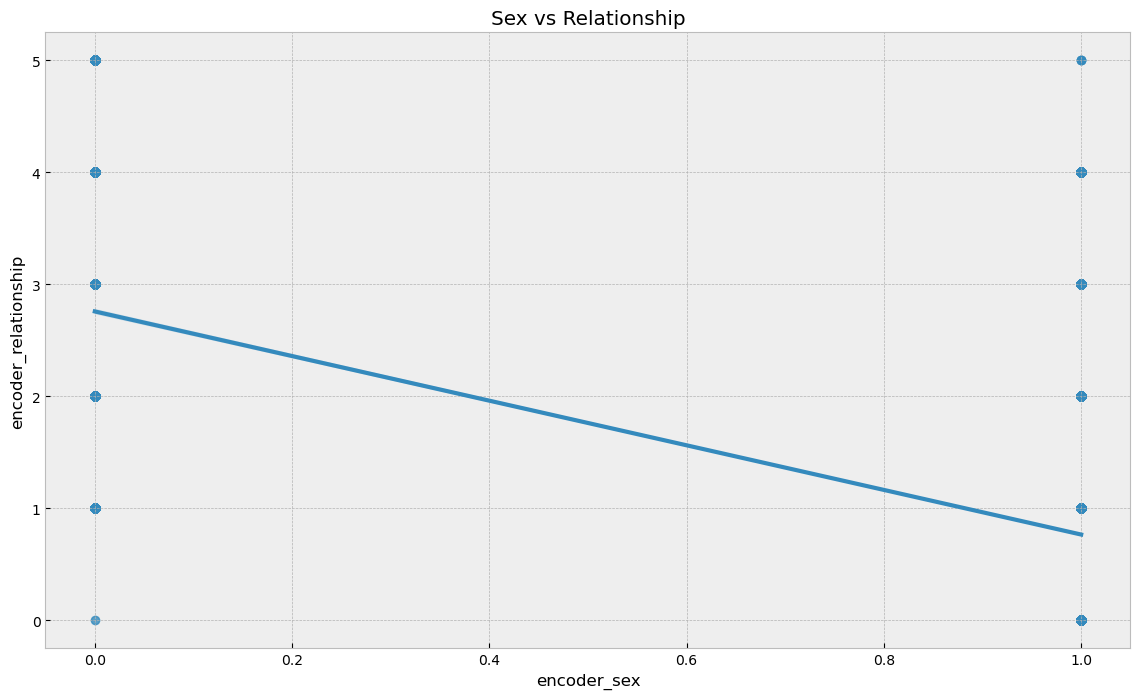

In [106]:
plt.figure(figsize=(14,8))
sns.regplot(x='encoder_sex', y='encoder_relationship', data=df_x_num)
plt.title('Sex vs Relationship')

In [107]:
corr_matrix_sp = df_x_num.corr(method='spearman')
sorted_mat = corr_matrix_sp.unstack().sort_values()
sorted_mat

encoder_sex             encoder_relationship     -0.619196
encoder_relationship    encoder_sex              -0.619196
encoder_marital-status  age                      -0.373081
age                     encoder_marital-status   -0.373081
hours-per-week          encoder_relationship     -0.308158
                                                    ...   
encoder_education       encoder_education         1.000000
encoder_workclass       encoder_workclass         1.000000
hours-per-week          hours-per-week            1.000000
encoder_sex             encoder_sex               1.000000
encoder_native-country  encoder_native-country    1.000000
Length: 100, dtype: float64

<Axes: >

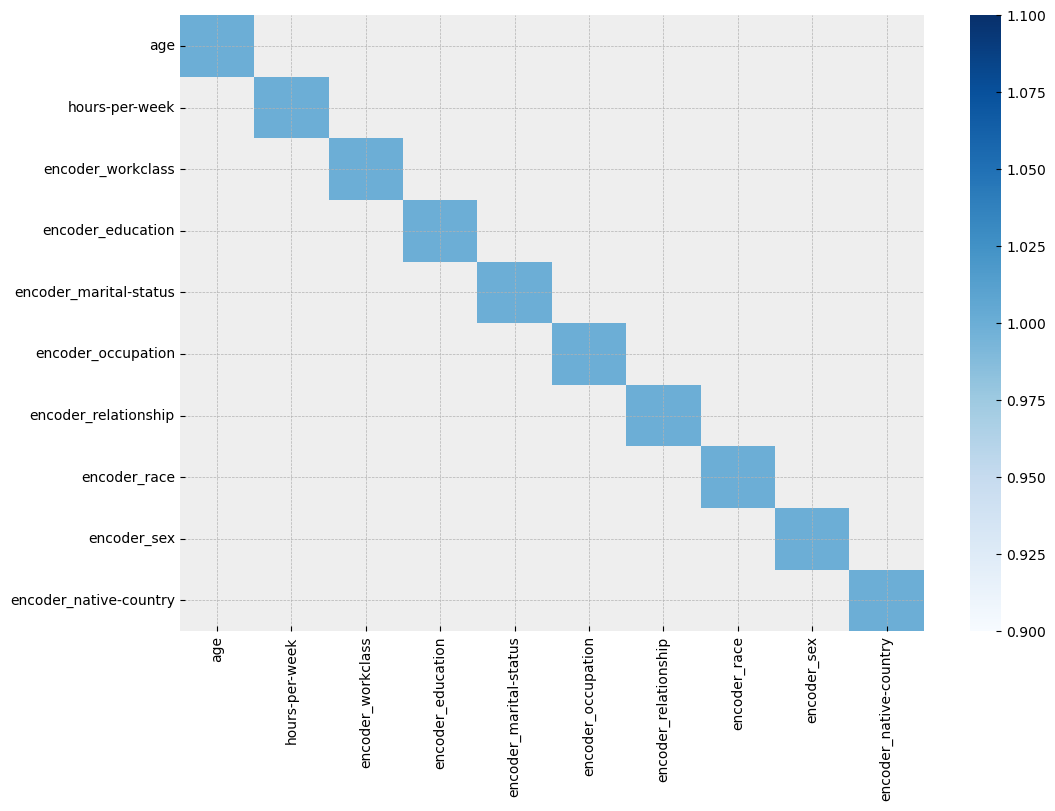

In [108]:
corr_alta = corr_matrix_sp[corr_matrix_sp>=.6]

plt.figure(figsize=(12,8))
sns.heatmap(corr_alta, cmap="Blues")

In [109]:
def coefcorr(x: pd.DataFrame, thres: float):
    #generate corr
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

coefcorr(df_x_num, 0.5)

Variable_1   Variable_2  corr_value
1  encoder_relationship  encoder_sex   -0.619196

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

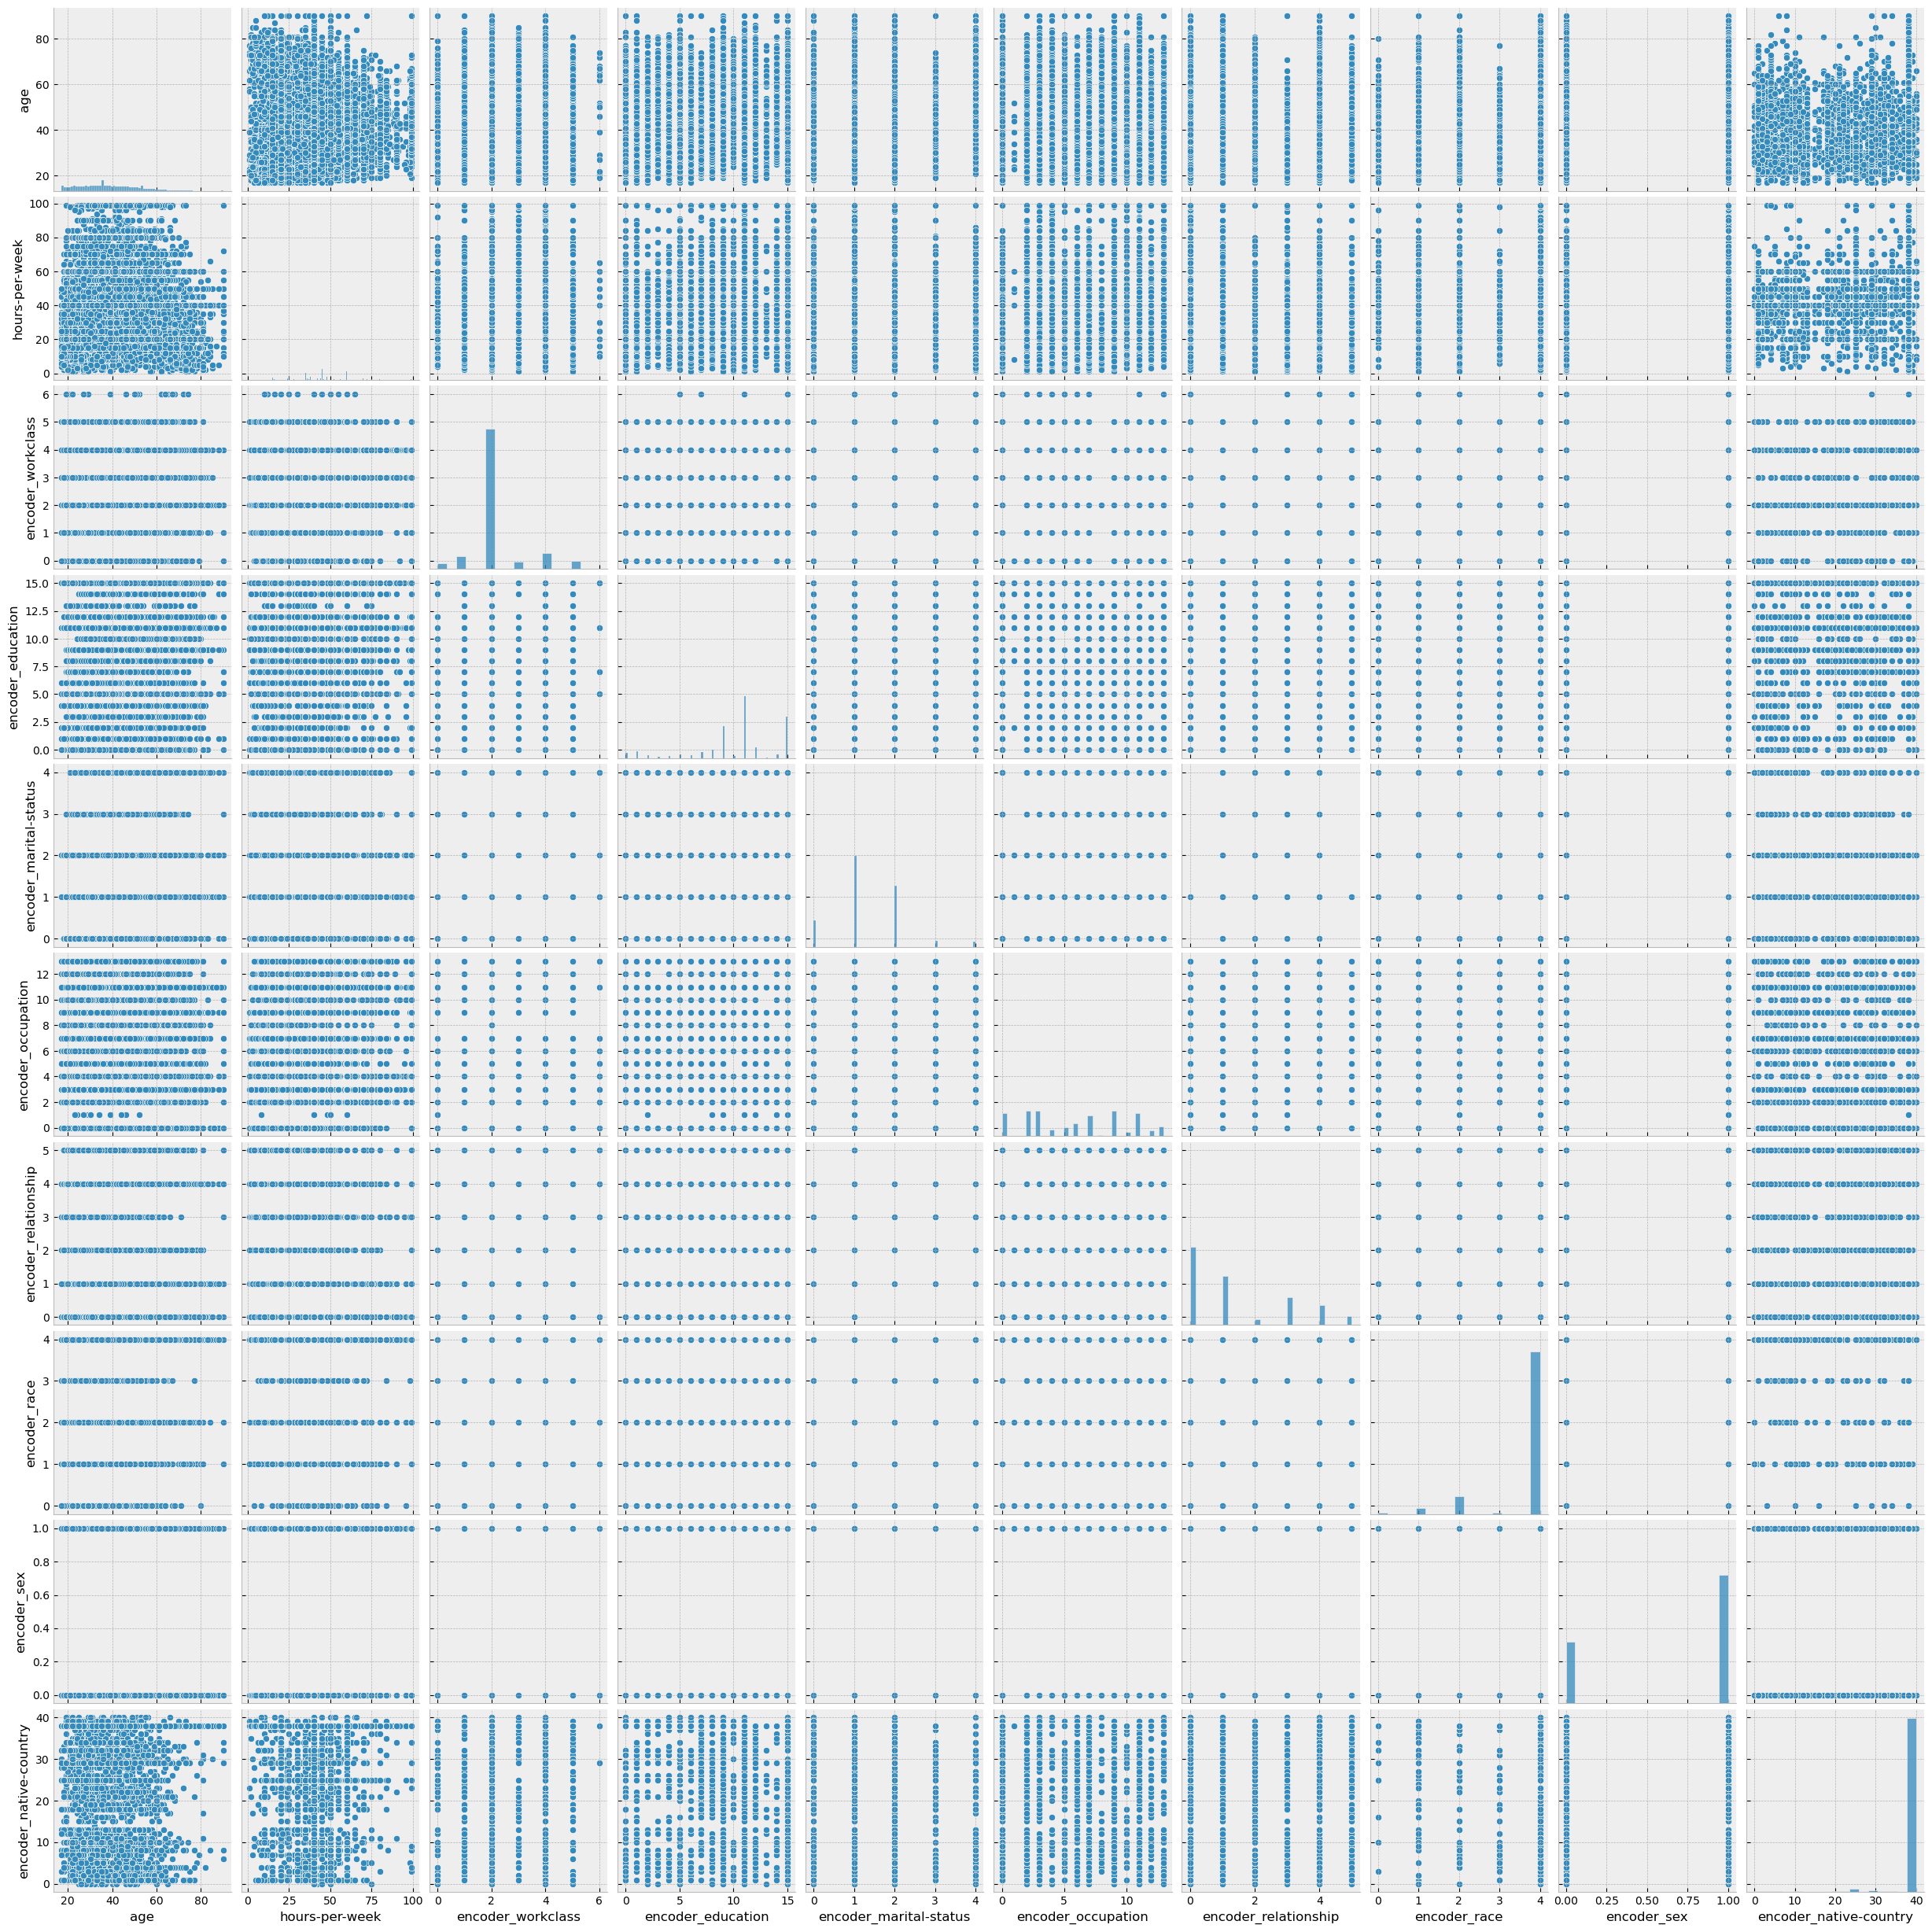

In [110]:
#plt.figure(figsize=(14,8))
#plt.figure(dpi=120)
sns.pairplot(data=df_x)
plt.show()

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1400x1400 with 0 Axes>

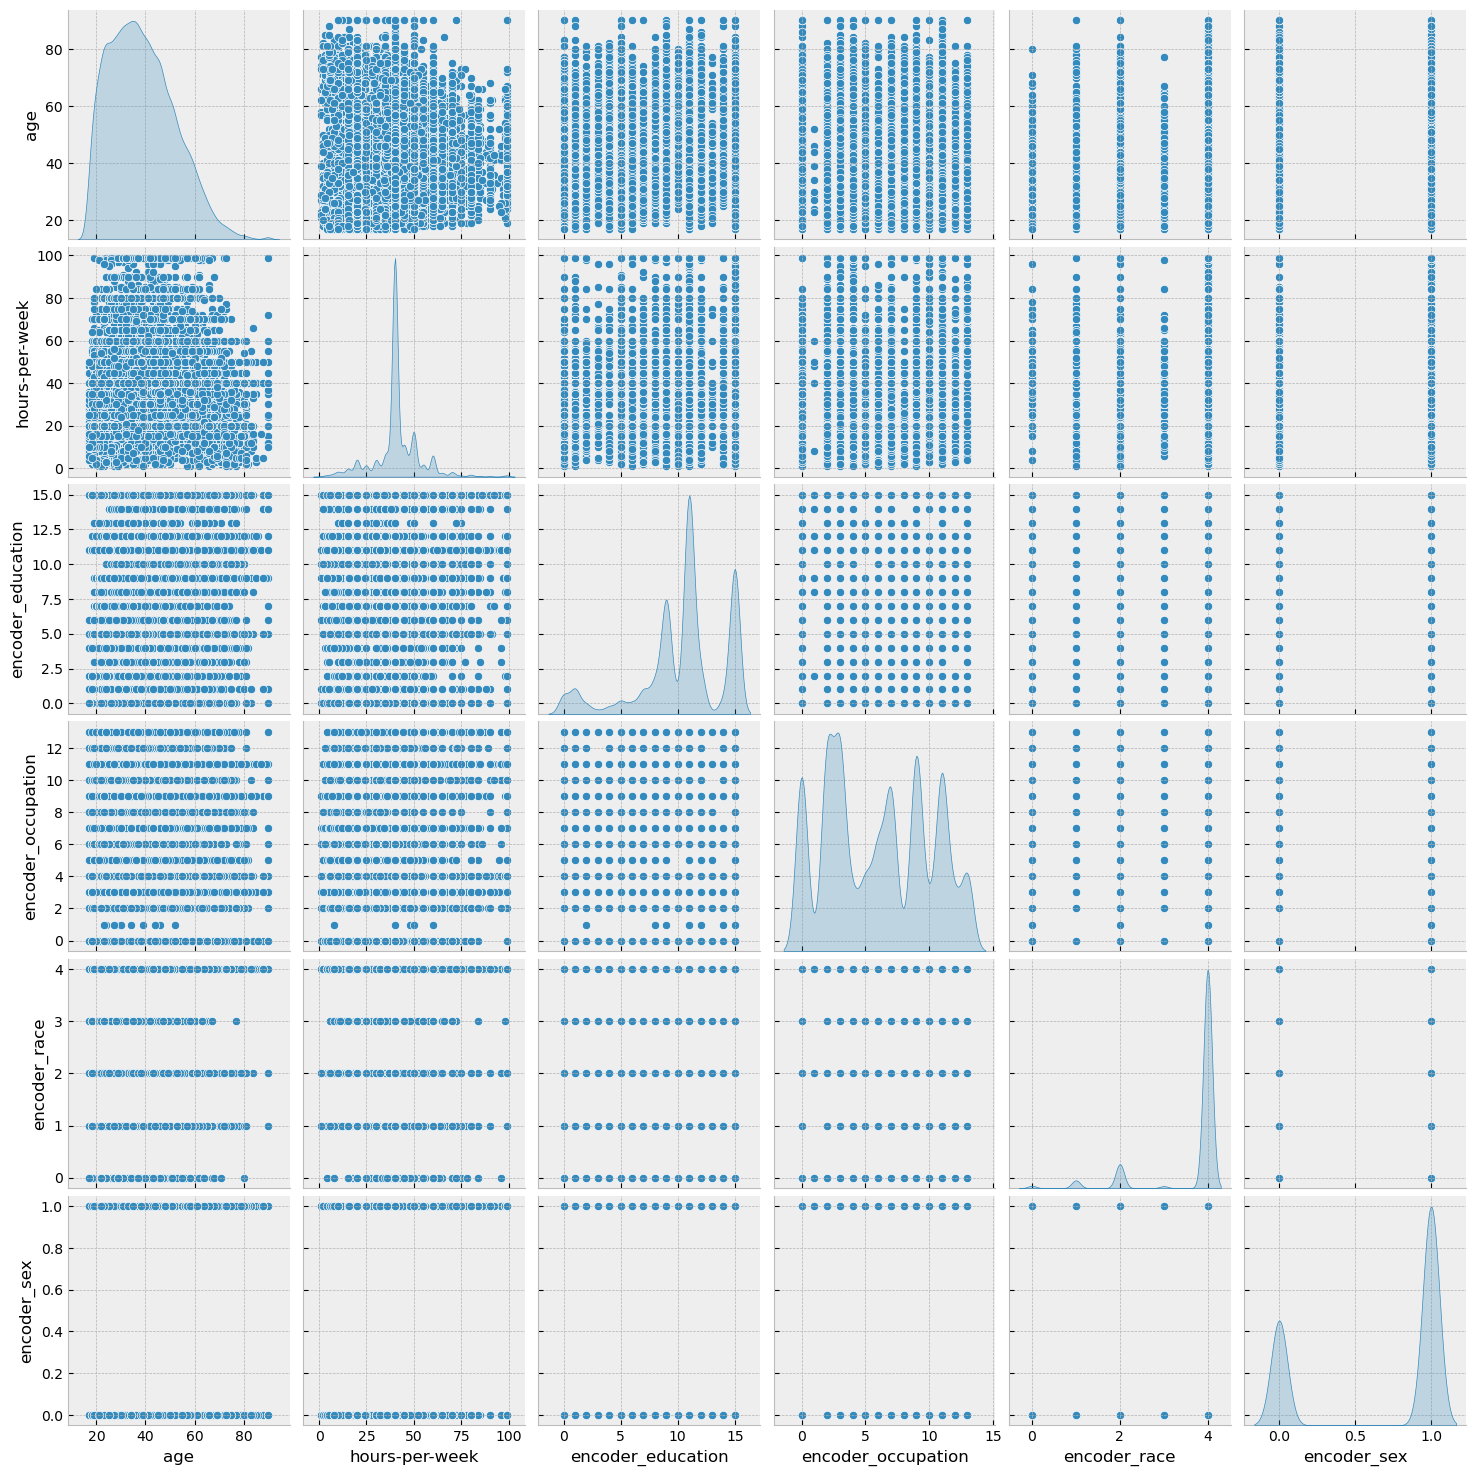

In [111]:
plt.figure(figsize=(14, 14))

g = sns.pairplot(df_x_num[['age', 'hours-per-week', 'encoder_education', 'encoder_occupation', 'encoder_race', 'encoder_sex']], diag_kind='kde');

In [112]:
for i in df_x_num.columns:
    # Calcular la media
    media = df_x_num[i].mean()

    # Calcular la mediana
    mediana = df_x_num[i].median()

    # Calcular la moda
    moda = df_x_num[i].mode().values[0]

    # Calcular la asimetría
    asimetria = df_x_num[i].skew()
    
    # Imprimir los resultados
    print("Media:", media)
    print("Mediana:", mediana)
    print("Moda:", moda)
    print("Asimetría:", asimetria)
    

Media: 38.55660069949818
Mediana: 37.0
Moda: 36
Asimetría: 0.5342298728864318
Media: 40.94840657788978
Mediana: 40.0
Moda: 40
Asimetría: 0.3410760366623728
Media: 2.205200616948711
Mediana: 2.0
Moda: 2.0
Asimetría: 1.1478586315174921
Media: 10.309256403015228
Mediana: 11.0
Moda: 11.0
Asimetría: -0.9429974901729827
Media: 1.3316316555514522
Mediana: 1.0
Moda: 1.0
Asimetría: 0.6937643576327857
Media: 5.979080225055938
Mediana: 6.0
Moda: 9.0
Asimetría: 0.10271837225492934
Media: 1.411965329220342
Mediana: 1.0
Moda: 0.0
Asimetría: 0.831531458872184
Media: 3.672061347294332
Mediana: 4.0
Moda: 4.0
Asimetría: -2.468710899282474
Media: 0.6759064149631786
Mediana: 1.0
Moda: 1.0
Asimetría: -0.7517048003973005
Media: 36.42919210131862
Mediana: 38.0
Moda: 38.0
Asimetría: -4.261094907388304


## 5.2.- Analizamos categorias para reducir estados (agrupamiento)

In [113]:
import scipy
scipy.stats.describe(df_x['age'])

DescribeResult(nobs=46033, minmax=(17, 90), mean=38.55660069949818, variance=174.3526845863195, skewness=0.5342124646779118, kurtosis=-0.14959433786971)

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


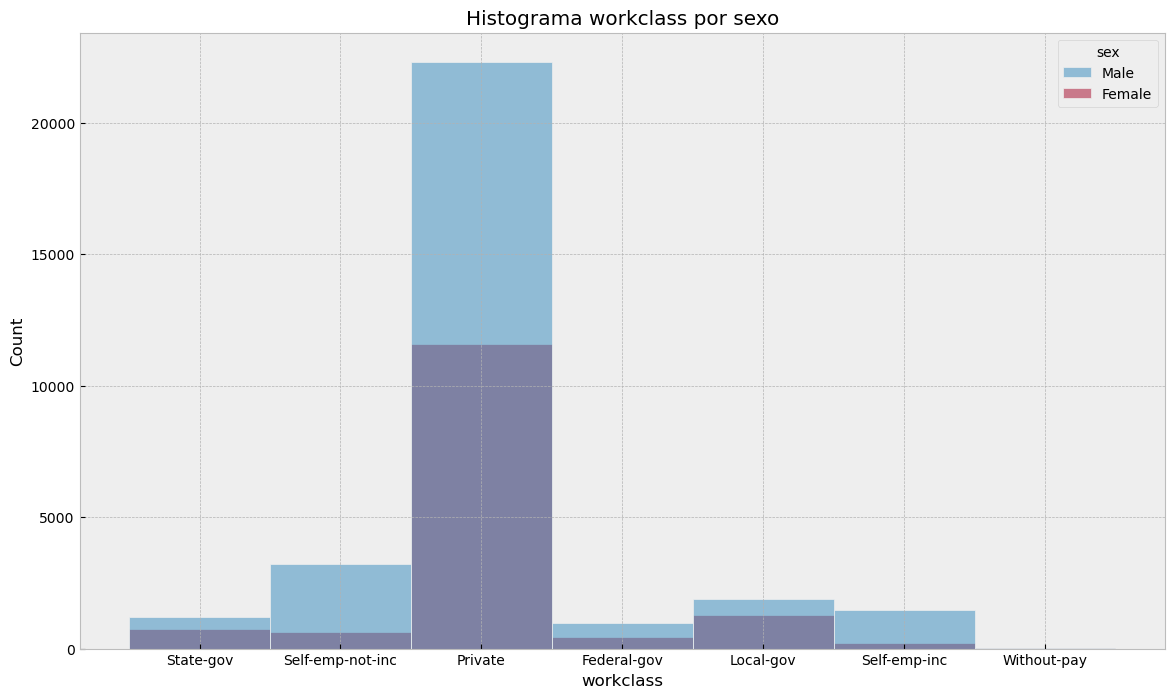

In [114]:
plt.figure(figsize=(14,8))
sns.histplot(data=df_x,x='workclass',hue='sex')
plt.title('Histograma workclass por sexo')
plt.show()

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

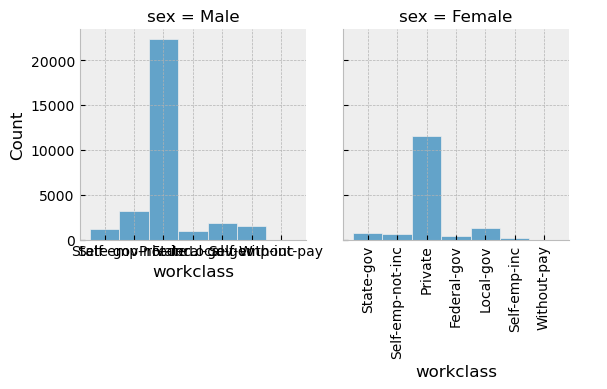

In [115]:
plt.figure(figsize=(14,8))

g = sns.FacetGrid(df_x,col = 'sex',margin_titles=True)

g.map(sns.histplot,'workclass')
g.add_legend()
#rotate x-axis labels
plt.xticks(rotation='vertical')
plt.show()

C:\ProgramData\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


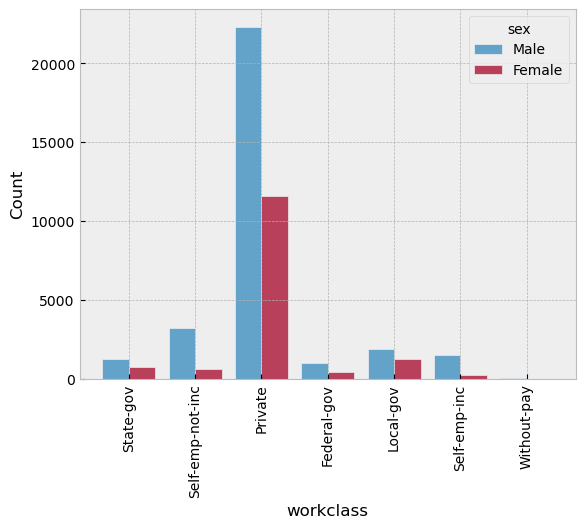

In [116]:
sns.histplot(data=df_x, x="workclass", hue="sex", multiple="dodge", shrink=.8)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1400x800 with 0 Axes>

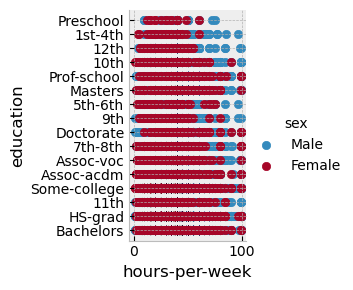

In [117]:
plt.figure(figsize=(14,8))
sns.FacetGrid(df_x,hue = 'sex').map(plt.scatter,'hours-per-week','education').add_legend();
plt.show()

# 6.- Normalización
## https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

### StandardScaler
### MinMaxScaler
### RobustScaler()

## Voy arrancar con el dataframe df_final

In [118]:
from sklearn import preprocessing

In [119]:
df_final.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  
0  Not-in-family  White    Male              40  United-States  <=50K  
1        Husband  White    Male              13  United-States  <=50K  
2  Not-in-family  White    Male              40  United-States  <=50K  
3        Husband  Black    Male              40  United-States  <=50K  
4           Wife  Black  Female              40           Cuba  <=50K

## 6.1.- Categorías en la variable TARGET unifico el 2 estados: ['<=50k'; ">50k"]
## La variable target 'income' tiene 4 estados posibles por un caracter punto '.' al final

In [120]:
df_final['income'] = df_final['income'].apply(lambda x: '<=50K' if '<=50K.' in x else x)
df_final['income'] = df_final['income'].apply(lambda x: '>50K' if '>50K.' in x else x)

In [121]:
df_final['income'].nunique()

2

In [122]:
df_final['hours-per-week'].nunique()

96

In [123]:
df_final['age'].nunique()

74

## 6.2.- Categorías en las variables 'AGE'Categorías en las variables 'AGE' 'HOURS-PER-WEEK'

### Con los campos de 'age' y 'hours-per-week' tambien resulta conveniente reducir las categorías.
### Se propone utilizar el cálculo de bins numpy para histograma y evaluar una reducción de categorias

In [124]:
df_final['age'].nunique()

74

In [125]:
q4_edad = np.percentile(df_final['age'],95)
q1_edad = np.percentile(df_final['age'],5)
print('Analisis intercuartil para edad')
print(f'percentile q4 es:', q4_edad)
print(f'percentile q1 es:', q1_edad)

Analisis intercuartil para edad
percentile q4 es: 62.0
percentile q1 es: 20.0


In [126]:
hist,bin_edges = np.histogram(df_final['age'])
print(hist)
print(bin_edges)

[7398 8386 8886 8992 5800 3670 2043  584  195   79]
[17.  24.3 31.6 38.9 46.2 53.5 60.8 68.1 75.4 82.7 90. ]


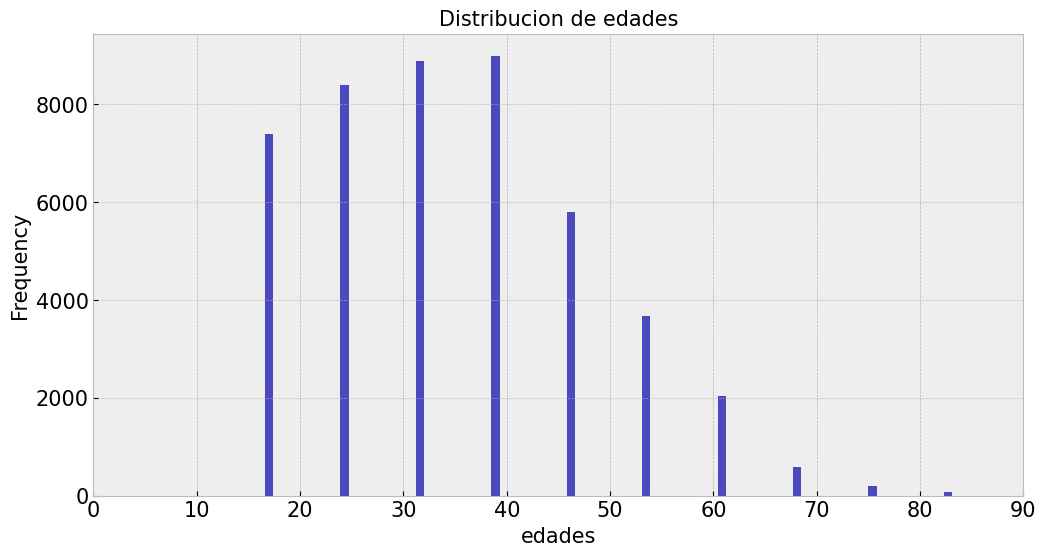

In [127]:
plt.figure(figsize=[12,6])

plt.bar(bin_edges[:-1], hist, color='#0504aa',alpha=0.7) #, width = 0.5
plt.xlim(0, max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('edades',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribucion de edades',fontsize=15)
plt.show()

In [128]:
df_final.loc[df_final['age'] < bin_edges[1],'encoder_age'] = bin_edges[1]
df_final.loc[df_final['age'].between(bin_edges[1],bin_edges[2]),'encoder_age'] = bin_edges[2]
df_final.loc[df_final['age'].between(bin_edges[2],bin_edges[3]),'encoder_age'] = bin_edges[3]
df_final.loc[df_final['age'].between(bin_edges[3],bin_edges[4]),'encoder_age'] = bin_edges[4]
df_final.loc[df_final['age'].between(bin_edges[4],bin_edges[5]),'encoder_age'] = bin_edges[5]
df_final.loc[df_final['age'].between(bin_edges[5],bin_edges[6]),'encoder_age'] = bin_edges[6]
df_final.loc[df_final['age'].between(bin_edges[6],bin_edges[7]),'encoder_age'] = bin_edges[7]
df_final.loc[df_final['age'].between(bin_edges[7],bin_edges[8]),'encoder_age'] = bin_edges[8]
df_final.loc[df_final['age'] > bin_edges[8],'encoder_age'] = bin_edges[9]


In [129]:
df_final.head()

age         workclass  education marital-status         occupation  \
0   39         State-gov  Bachelors  Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2   38           Private    HS-grad       Divorced  Handlers-cleaners   
3   53           Private       11th        Married  Handlers-cleaners   
4   28           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex  hours-per-week native-country income  \
0  Not-in-family  White    Male              40  United-States  <=50K   
1        Husband  White    Male              13  United-States  <=50K   
2  Not-in-family  White    Male              40  United-States  <=50K   
3        Husband  Black    Male              40  United-States  <=50K   
4           Wife  Black  Female              40           Cuba  <=50K   

   encoder_age  
0         46.2  
1         53.5  
2         38.9  
3         53.5  
4         31.6

In [130]:
df_final['encoder_age'].nunique()

9

In [131]:
#df_final_2 = df_final.drop('age',axis=1)

In [132]:
#df_final_2.columns

In [133]:
df_final['hours-per-week'].nunique()

96

In [134]:
hist,bin_hours = np.histogram(df_final['hours-per-week'])
print(hist)
print(bin_hours)

[  794  2864  2986 25364  4558  5716  2590   665   295   201]
[ 1.  10.8 20.6 30.4 40.2 50.  59.8 69.6 79.4 89.2 99. ]


## 6.3.- Categorías en las variables 'HOURS-PER-WEEK'

In [135]:
df_final.loc[df_final['hours-per-week'] < bin_hours[1],'encoder_hpw'] = bin_hours[1]
df_final.loc[df_final['hours-per-week'].between(bin_hours[1],bin_hours[2]),'encoder_hpw'] = bin_hours[2]
df_final.loc[df_final['hours-per-week'].between(bin_hours[2],bin_hours[3]),'encoder_hpw'] = bin_hours[3]
df_final.loc[df_final['hours-per-week'].between(bin_hours[3],bin_hours[4]),'encoder_hpw'] = bin_hours[4]
df_final.loc[df_final['hours-per-week'].between(bin_hours[4],bin_hours[5]),'encoder_hpw'] = bin_hours[5]
df_final.loc[df_final['hours-per-week'].between(bin_hours[5],bin_hours[6]),'encoder_hpw'] = bin_hours[6]
df_final.loc[df_final['hours-per-week'].between(bin_hours[6],bin_hours[7]),'encoder_hpw'] = bin_hours[7]
df_final.loc[df_final['hours-per-week'].between(bin_hours[7],bin_hours[8]),'encoder_hpw'] = bin_hours[8]
df_final.loc[df_final['hours-per-week'] > bin_hours[8],'encoder_hpw'] = bin_hours[9]


In [136]:
df_final['encoder_hpw'].nunique()

9

In [137]:
df_final_2= df_final.drop(['age','hours-per-week'],axis=1)

In [138]:
df_final_2.head()

workclass  education marital-status         occupation  \
0         State-gov  Bachelors  Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2           Private    HS-grad       Divorced  Handlers-cleaners   
3           Private       11th        Married  Handlers-cleaners   
4           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex native-country income  encoder_age  \
0  Not-in-family  White    Male  United-States  <=50K         46.2   
1        Husband  White    Male  United-States  <=50K         53.5   
2  Not-in-family  White    Male  United-States  <=50K         38.9   
3        Husband  Black    Male  United-States  <=50K         53.5   
4           Wife  Black  Female           Cuba  <=50K         31.6   

   encoder_hpw  
0         40.2  
1         20.6  
2         40.2  
3         40.2  
4         40.2

In [139]:
#columns_2 = df_final_2_num.columns

## 6.4.- Paso los campos categóricos a numericos
### Elijo que lo realice basado en un orden/criterio comenzando por '0'

In [140]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(df_final_2)

OrdinalEncoder()

In [141]:
columnas = df_final_2.select_dtypes(exclude=['int64']).columns
for i in columnas:
    nuevo_campo = 'encoder_'+ i
    df_final_2[nuevo_campo] = encoder.fit_transform(df_final_2[[i]])

In [142]:
df_final_2.head()

workclass  education marital-status         occupation  \
0         State-gov  Bachelors  Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors        Married    Exec-managerial   
2           Private    HS-grad       Divorced  Handlers-cleaners   
3           Private       11th        Married  Handlers-cleaners   
4           Private  Bachelors        Married     Prof-specialty   

    relationship   race     sex native-country income  encoder_age  ...  \
0  Not-in-family  White    Male  United-States  <=50K         46.2  ...   
1        Husband  White    Male  United-States  <=50K         53.5  ...   
2  Not-in-family  White    Male  United-States  <=50K         38.9  ...   
3        Husband  Black    Male  United-States  <=50K         53.5  ...   
4           Wife  Black  Female           Cuba  <=50K         31.6  ...   

   encoder_education  encoder_marital-status  encoder_occupation  \
0                9.0                     2.0                 0.0   
1                9.0                     1.0                 3.0   
2               11.0                     0.0                 5.0   
3                1.0                     1.0                 5.0   
4                9.0                     1.0                 9.0   

   encoder_relationship  encoder_race  encoder_sex  encoder_native-country  \
0                   1.0           4.0          1.0                    38.0   
1                   0.0           4.0          1.0                    38.0   
2                   1.0           4.0          1.0                    38.0   
3                   0.0           2.0          1.0                    38.0   
4                   5.0           2.0          0.0                     4.0   

   encoder_income  encoder_encoder_age  encoder_encoder_hpw  
0             0.0                  3.0                  3.0  
1             0.0                  4.0                  1.0  
2             0.0                  2.0                  3.0  
3             0.0                  4.0                  3.0  
4             0.0                  1.0                  3.0  

[5 rows x 22 columns]

In [143]:
print(df_final_2['encoder_income'].unique())
print(df_final_2['income'].unique())

[0. 1.]
['<=50K' '>50K']


In [144]:
df_final_2['encoder_income'].nunique()

2

In [145]:
df_final_2_num = df_final_2.select_dtypes(exclude=['object'])
df_final_2_num

encoder_age  encoder_hpw  encoder_workclass  encoder_education  \
0             46.2         40.2                5.0                9.0   
1             53.5         20.6                4.0                9.0   
2             38.9         40.2                2.0               11.0   
3             53.5         40.2                2.0                1.0   
4             31.6         40.2                2.0                9.0   
...            ...          ...                ...                ...   
48836         38.9         40.2                2.0                9.0   
48837         46.2         40.2                2.0                9.0   
48839         38.9         59.8                2.0                9.0   
48840         46.2         40.2                2.0                9.0   
48841         38.9         69.6                3.0                9.0   

       encoder_marital-status  encoder_occupation  encoder_relationship  \
0                         2.0                 0.0                   1.0   
1                         1.0                 3.0                   0.0   
2                         0.0                 5.0                   1.0   
3                         1.0                 5.0                   0.0   
4                         1.0                 9.0                   5.0   
...                       ...                 ...                   ...   
48836                     2.0                 9.0                   3.0   
48837                     0.0                 9.0                   1.0   
48839                     1.0                 9.0                   0.0   
48840                     0.0                 0.0                   3.0   
48841                     1.0                 3.0                   0.0   

       encoder_race  encoder_sex  encoder_native-country  encoder_income  \
0               4.0          1.0                    38.0             0.0   
1               4.0          1.0                    38.0             0.0   
2               4.0          1.0                    38.0             0.0   
3               2.0          1.0                    38.0             0.0   
4               2.0          0.0                     4.0             0.0   
...             ...          ...                     ...             ...   
48836           4.0          1.0                    38.0             0.0   
48837           4.0          0.0                    38.0             0.0   
48839           4.0          1.0                    38.0             0.0   
48840           1.0          1.0                    38.0             0.0   
48841           4.0          1.0                    38.0             1.0   

       encoder_encoder_age  encoder_encoder_hpw  
0                      3.0                  3.0  
1                      4.0                  1.0  
2                      2.0                  3.0  
3                      4.0                  3.0  
4                      1.0                  3.0  
...                    ...                  ...  
48836                  2.0                  3.0  
48837                  3.0                  3.0  
48839                  2.0                  5.0  
48840                  3.0                  3.0  
48841                  2.0                  6.0  

[46033 rows x 13 columns]

In [146]:
df_final_2_num.describe().T

count       mean        std   min   25%   50%   75%  \
encoder_age             46033.0  42.254958  13.205271  24.3  31.6  38.9  53.5   
encoder_hpw             46033.0  43.990307  13.586388  10.8  40.2  40.2  50.0   
encoder_workclass       46033.0   2.205201   0.957854   0.0   2.0   2.0   2.0   
encoder_education       46033.0  10.309256   3.813403   0.0   9.0  11.0  12.0   
encoder_marital-status  46033.0   1.331632   0.853993   0.0   1.0   1.0   2.0   
encoder_occupation      46033.0   5.979080   4.023434   0.0   2.0   6.0   9.0   
encoder_relationship    46033.0   1.411965   1.597293   0.0   0.0   1.0   3.0   
encoder_race            46033.0   3.672061   0.841747   0.0   4.0   4.0   4.0   
encoder_sex             46033.0   0.675906   0.468040   0.0   0.0   1.0   1.0   
encoder_native-country  46033.0  36.429192   6.029731   0.0  38.0  38.0  38.0   
encoder_income          46033.0   0.248126   0.431930   0.0   0.0   0.0   0.0   
encoder_encoder_age     46033.0   2.459583   1.808941   0.0   1.0   2.0   4.0   
encoder_encoder_hpw     46033.0   3.386766   1.386366   0.0   3.0   3.0   4.0   

                         max  
encoder_age             82.7  
encoder_hpw             89.2  
encoder_workclass        6.0  
encoder_education       15.0  
encoder_marital-status   4.0  
encoder_occupation      13.0  
encoder_relationship     5.0  
encoder_race             4.0  
encoder_sex              1.0  
encoder_native-country  40.0  
encoder_income           1.0  
encoder_encoder_age      8.0  
encoder_encoder_hpw      8.0

In [203]:
df_final_2_num = df_final_2_num.drop(['encoder_age','encoder_hpw'],axis=1)

## 6.5.- Voy a correr un SCALER
### Las medias y los medianas se acercan algo...podría llegar a parecerse a una normal
### como clasifique 'hours-per-week' y 'age' y son rangos númericos no pasaron por el encoder
### estos campos y "education", "ocupation", "native-country" tienen rangos altos


In [204]:
columns = df_final_2_num.columns

In [205]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df_final_2_num)
robust_df = pd.DataFrame(robust_df)
robust_df.columns = columns

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_final_2_num)
standard_df = pd.DataFrame(standard_df)
standard_df.columns = columns

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_final_2_num)
minmax_df = pd.DataFrame(minmax_df)
minmax_df.columns = columns

In [206]:
robust_df.describe().T

count      mean       std        min       25%  50%  \
encoder_workclass       46033.0  0.205201  0.957854  -2.000000  0.000000  0.0   
encoder_education       46033.0 -0.230248  1.271134  -3.666667 -0.666667  0.0   
encoder_marital-status  46033.0  0.331632  0.853993  -1.000000  0.000000  0.0   
encoder_occupation      46033.0 -0.002989  0.574776  -0.857143 -0.571429  0.0   
encoder_relationship    46033.0  0.137322  0.532431  -0.333333 -0.333333  0.0   
encoder_race            46033.0 -0.327939  0.841747  -4.000000  0.000000  0.0   
encoder_sex             46033.0 -0.324094  0.468040  -1.000000 -1.000000  0.0   
encoder_native-country  46033.0 -1.570808  6.029731 -38.000000  0.000000  0.0   
encoder_income          46033.0  0.248126  0.431930   0.000000  0.000000  0.0   
encoder_encoder_age     46033.0  0.153194  0.602980  -0.666667 -0.333333  0.0   
encoder_encoder_hpw     46033.0  0.386766  1.386366  -3.000000  0.000000  0.0   

                             75%       max  
encoder_workclass       0.000000  4.000000  
encoder_education       0.333333  1.333333  
encoder_marital-status  1.000000  3.000000  
encoder_occupation      0.428571  1.000000  
encoder_relationship    0.666667  1.333333  
encoder_race            0.000000  0.000000  
encoder_sex             0.000000  0.000000  
encoder_native-country  0.000000  2.000000  
encoder_income          0.000000  1.000000  
encoder_encoder_age     0.666667  2.000000  
encoder_encoder_hpw     1.000000  5.000000

In [207]:
standard_df.describe().T

count          mean       std       min       25%  \
encoder_workclass       46033.0 -1.462514e-16  1.000011 -2.302254 -0.214232   
encoder_education       46033.0  1.156120e-16  1.000011 -2.703456 -0.343334   
encoder_marital-status  46033.0  3.565602e-17  1.000011 -1.559318 -0.388335   
encoder_occupation      46033.0  2.284455e-17  1.000011 -1.486080 -0.988987   
encoder_relationship    46033.0 -8.242561e-17  1.000011 -0.883984 -0.883984   
encoder_race            46033.0  1.646197e-16  1.000011 -4.362475  0.389597   
encoder_sex             46033.0  9.570015e-18  1.000011 -1.444136 -1.444136   
encoder_native-country  46033.0 -1.028005e-16  1.000011 -6.041661  0.260513   
encoder_income          46033.0  2.423375e-17  1.000011 -0.574466 -0.574466   
encoder_encoder_age     46033.0 -5.680267e-17  1.000011 -1.359696 -0.806880   
encoder_encoder_hpw     46033.0  1.291952e-16  1.000011 -2.442935 -0.278981   

                             50%       75%       max  
encoder_workclass      -0.214232 -0.214232  3.961813  
encoder_education       0.181138  0.443373  1.230081  
encoder_marital-status -0.388335  0.782648  3.124613  
encoder_occupation      0.005200  0.750839  1.745026  
encoder_relationship   -0.257918  0.994215  2.246347  
encoder_race            0.389597  0.389597  0.389597  
encoder_sex             0.692456  0.692456  0.692456  
encoder_native-country  0.260513  0.260513  0.592207  
encoder_income         -0.574466 -0.574466  1.740748  
encoder_encoder_age    -0.254065  0.851566  3.062829  
encoder_encoder_hpw    -0.278981  0.442337  3.327609

### El standard lo descarto porque las variables no tienen distribución normal standar

In [208]:
minmax_df.describe().T

count      mean       std  min       25%       50%  \
encoder_workclass       46033.0  0.367533  0.159642  0.0  0.333333  0.333333   
encoder_education       46033.0  0.687284  0.254227  0.0  0.600000  0.733333   
encoder_marital-status  46033.0  0.332908  0.213498  0.0  0.250000  0.250000   
encoder_occupation      46033.0  0.459929  0.309495  0.0  0.153846  0.461538   
encoder_relationship    46033.0  0.282393  0.319459  0.0  0.000000  0.200000   
encoder_race            46033.0  0.918015  0.210437  0.0  1.000000  1.000000   
encoder_sex             46033.0  0.675906  0.468040  0.0  0.000000  1.000000   
encoder_native-country  46033.0  0.910730  0.150743  0.0  0.950000  0.950000   
encoder_income          46033.0  0.248126  0.431930  0.0  0.000000  0.000000   
encoder_encoder_age     46033.0  0.307448  0.226118  0.0  0.125000  0.250000   
encoder_encoder_hpw     46033.0  0.423346  0.173296  0.0  0.375000  0.375000   

                             75%  max  
encoder_workclass       0.333333  1.0  
encoder_education       0.800000  1.0  
encoder_marital-status  0.500000  1.0  
encoder_occupation      0.692308  1.0  
encoder_relationship    0.600000  1.0  
encoder_race            1.000000  1.0  
encoder_sex             1.000000  1.0  
encoder_native-country  0.950000  1.0  
encoder_income          0.000000  1.0  
encoder_encoder_age     0.500000  1.0  
encoder_encoder_hpw     0.500000  1.0

### Con el MaxMin scaller parece que las variables quedan más 'nomalizadas'...entre la MODA y MEDIA 

# 7.- Desdoblamiento entre TRAIN y TEST

In [209]:
X_data = df_final_2_num.drop(columns='encoder_income')
Y_data = df_final_2_num['encoder_income']

In [210]:
print(X_data.shape,Y_data.shape)

(46033, 10) (46033,)


In [211]:
df_final_2_num.columns

Index(['encoder_workclass', 'encoder_education', 'encoder_marital-status',
       'encoder_occupation', 'encoder_relationship', 'encoder_race',
       'encoder_sex', 'encoder_native-country', 'encoder_income',
       'encoder_encoder_age', 'encoder_encoder_hpw'],
      dtype='object')

## 7.1.- Corroboro que no existan relaciones fuertes entre variables previo a la aplicación del modelo

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(X_data.corr(method='spearman'), annot=True, ax=ax)

In [213]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3)

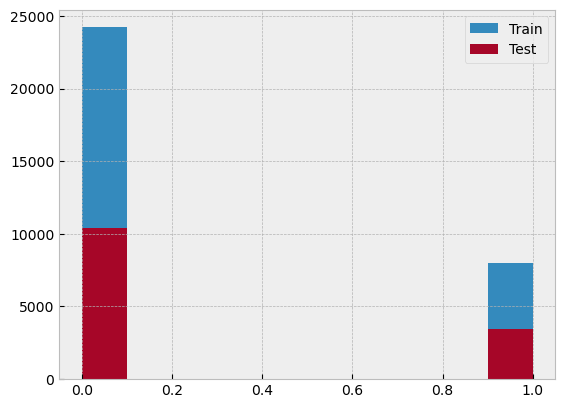

In [214]:
plt.hist(y_train, label="Train")
plt.hist(y_test, label="Test")
plt.legend()
plt.show()

# Esto es de la primera entrega de análisis de modelos

# 8.- Algoritmos de Machine Learning
## 8.1.- Aprendizage supervizado
### https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### 8.1.- Modelo Lineal

In [215]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_lineal = reg.predict(X_test)

In [216]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(32223, 10) (13810, 10)
(32223,) (13810,)


In [217]:
X_train.columns

Index(['encoder_workclass', 'encoder_education', 'encoder_marital-status',
       'encoder_occupation', 'encoder_relationship', 'encoder_race',
       'encoder_sex', 'encoder_native-country', 'encoder_encoder_age',
       'encoder_encoder_hpw'],
      dtype='object')

In [218]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lineal))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_lineal))

Coefficients: 
 [-0.01287387  0.00809747 -0.04473953  0.00352326 -0.02578965  0.01490819
  0.08728959  0.000637    0.0420694   0.04805248]
Mean squared error: 0.16
Coefficient of determination: 0.16


In [219]:
comparativo_lineal = pd.DataFrame({'actual' : y_test,'prediccion' : y_pred_lineal})
comparativo_lineal

actual  prediccion
18810     0.0    0.053052
32351     0.0    0.355943
31226     1.0    0.389645
5681      0.0    0.407447
38355     0.0    0.285790
...       ...         ...
43364     0.0    0.076271
14591     0.0    0.010013
22686     0.0    0.242383
31254     1.0    0.435077
40030     1.0    0.338069

[13810 rows x 2 columns]

### 8.1.1 Error

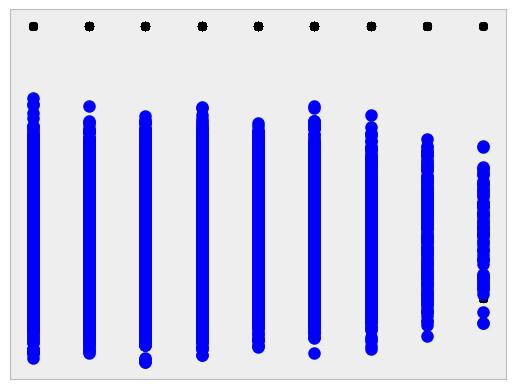

In [249]:
# Plot outputs
plt.scatter(X_test['encoder_encoder_age'], y_test, color="black")
plt.scatter(X_test['encoder_encoder_age'], y_pred_lineal, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Plot outputs
plt.scatter(X_test['encoder_hpw'], y_test, color="black")
plt.scatter(X_test['encoder_hpw'], y_pred_lineal, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

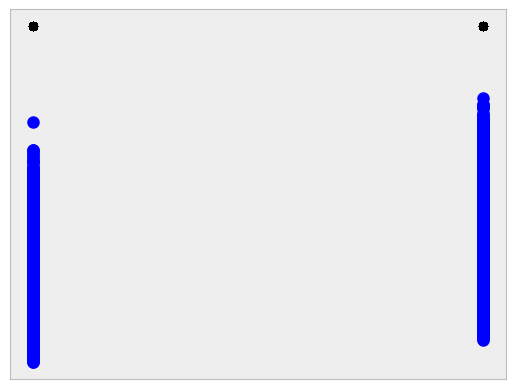

In [221]:
# Plot outputs
plt.scatter(X_test['encoder_sex'], y_test, color="black")
plt.scatter(X_test['encoder_sex'], y_pred_lineal, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### 8.2.- Modelo de árbol de decisión

In [222]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 42) # con hiperparametros default
model_default.fit(X_train, y_train)

#modelo generado con algun hiperparamtros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 42, max_depth=7)
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [223]:
#prediccion
y_pred_dtc = model_max_depth.predict(X_test)
y_pred_dtc

array([0., 0., 0., ..., 0., 1., 0.])

In [224]:
df_final_2_num['encoder_income'].unique()

array([0., 1.])

In [225]:
# METRICAS
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_dtc))


Accuracy score for test data is: 0.8251991310644461


In [226]:
comparativo_dtc = pd.DataFrame({'actual' : y_test,'prediccion' : y_pred_dtc})
comparativo_dtc

actual  prediccion
18810     0.0         0.0
32351     0.0         0.0
31226     1.0         0.0
5681      0.0         0.0
38355     0.0         0.0
...       ...         ...
43364     0.0         0.0
14591     0.0         1.0
22686     0.0         0.0
31254     1.0         1.0
40030     1.0         0.0

[13810 rows x 2 columns]

In [227]:
# VISUALIZACIÓN DEL ÁRBOL
!pip install pydotplus
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

Defaulting to user installation because normal site-packages is not writeable


In [228]:
def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

list_features = [x for x in df_final_2_num.columns if x != 'encoder_income']
tree_graph_to_png(model_max_depth, list_features, df_final_2_num['encoder_income'].unique().astype(str), 'model.png')

In [229]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


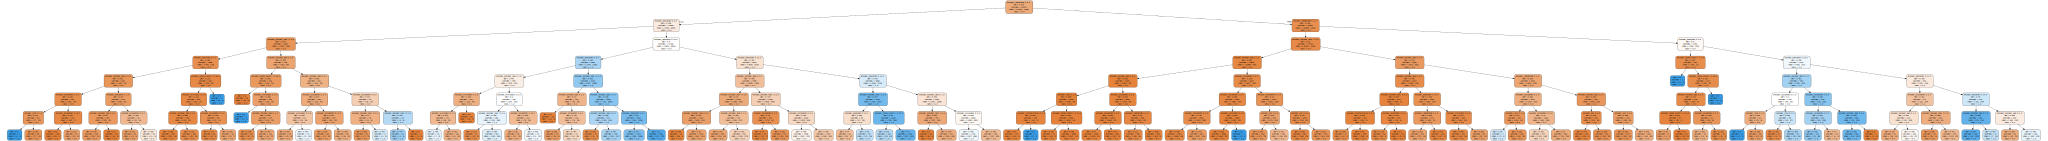

In [230]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
list_features = [x for x in df_final_2_num.columns if x != 'encoder_income']
data = export_graphviz(model_max_depth,out_file=None,feature_names=list_features,class_names=df_final_2_num['encoder_income'].unique().astype(str),
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(data)
graph

In [231]:
pydot_graph = pydotplus.graph_from_dot_data(data)
#pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5"')
pydot_graph

## Veo que se rompe el arból tiene múltiples niveles...

### 8.3.- RANDOM FOREST

In [232]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [233]:
# crear el clasificador
classifier = RandomForestRegressor(n_estimators=100)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_train, y_train)

RandomForestRegressor()

In [234]:
#fiteo la var x_test ya escalada
y_pred_rf = classifier.predict(X_test)

In [235]:
y_pred_rf

array([0.        , 0.        , 0.77511016, ..., 0.27989899, 0.80079095,
       0.30116543])

In [236]:
X_test['pred'] = y_pred_rf
X_test['target'] = y_test
X_test.head()

encoder_workclass  encoder_education  encoder_marital-status  \
18810                2.0                0.0                     0.0   
32351                2.0                5.0                     1.0   
31226                2.0               11.0                     1.0   
5681                 2.0                6.0                     1.0   
38355                2.0                5.0                     1.0   

       encoder_occupation  encoder_relationship  encoder_race  encoder_sex  \
18810                 5.0                   1.0           4.0          0.0   
32351                 6.0                   1.0           4.0          1.0   
31226                 3.0                   0.0           4.0          1.0   
5681                 11.0                   0.0           4.0          1.0   
38355                 5.0                   0.0           4.0          1.0   

       encoder_native-country  encoder_encoder_age  encoder_encoder_hpw  \
18810                    38.0                  1.0                  2.0   
32351                    38.0                  5.0                  3.0   
31226                    38.0                  2.0                  5.0   
5681                     38.0                  5.0                  3.0   
38355                    25.0                  3.0                  3.0   

          pred  target  
18810  0.00000     0.0  
32351  0.00000     0.0  
31226  0.77511     1.0  
5681   0.29000     0.0  
38355  0.06000     0.0

In [237]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

feature  importance
4    encoder_relationship    0.278035
1       encoder_education    0.179725
3      encoder_occupation    0.123902
8     encoder_encoder_age    0.123399
9     encoder_encoder_hpw    0.107825
0       encoder_workclass    0.084982
7  encoder_native-country    0.035193
5            encoder_race    0.034126
2  encoder_marital-status    0.022412
6             encoder_sex    0.010400

# 9.- Metricas calculadas
## Acá hay un error de concepto, estos Métricas se encuentran asociadas a modelos de Regresión

In [238]:
# METRICAS LINEAL
mean_lineal = mean_absolute_error(y_test, y_pred_lineal)
mean_lineal_percent = mean_absolute_percentage_error(y_test, y_pred_lineal)
r2_score_lineal = r2_score(y_test,y_pred_lineal)

#METRICAS DECISION TREE CLASSIFIER
mean_dtc = mean_absolute_error(y_test, y_pred_dtc)
mean_drc_percent = mean_absolute_percentage_error(y_test, y_pred_dtc)
r2_score_dtc = r2_score(y_test,y_pred_dtc)


# METRICAS RANDOM FOREST
mean_rf = mean_absolute_error(y_test, y_pred_rf)
mean_rf_percent = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_score_rf = r2_score(y_test,y_pred_rf)

# R2_AJUSTADO
n = len(y_test)
p = X_test.shape[1]
r2_lineal = r2_score(y_test,y_pred_lineal)
r2_dtc = r2_score(y_test,y_pred_dtc)
r2_rf = r2_score(y_test,y_pred_rf)

R2_ajustado_lineal = 1 - (1-r2_lineal)*((n-1)/(n-p-1))
R2_ajustado_dtc = 1 - (1-r2_dtc)*((n-1)/(n-p-1))
R2_ajustado_rf = 1 - (1-r2_rf)*((n-1)/(n-p-1))



print(f'LINEAL\n MEAN: {mean_lineal}\n r2_score: {r2_lineal}\n r2_ajustado: {R2_ajustado_lineal} {2}\nARBOL DE CLASIFICACIÓN\n MEAN: {mean_dtc}\n r2_score: {r2_score_dtc}\n r2_ajustado: {R2_ajustado_dtc}\nRANDOM FOREST\n MEAN: {mean_rf}\n r2_score: {r2_score_rf}\n r2_ajustado: {R2_ajustado_rf}\n')


LINEAL
 MEAN: 0.3254035026443301
 r2_score: 0.15765122259885778
 r2_ajustado: 0.15691858613232057 2
ARBOL DE CLASIFICACIÓN
 MEAN: 0.17480086893555394
 r2_score: 0.0623647770234379
 r2_ajustado: 0.061549264761662226
RANDOM FOREST
 MEAN: 0.22458846495713383
 r2_score: 0.3112806544560339
 r2_ajustado: 0.3106816378476026



## 9.1.- R2_AJUSTADO
n = len(y_test)
p = X_test.shape[1]
r2 = r2_score(y_test,y_pred_rf)
R2_ajustado = 1 - (1-r2)*((n-1)/(n-p-1))
R2_ajustado

# Nueva entrea con mejoras en modelos y correcciones conseptuales

# 10.- Hypertunning (Mejoras) de parámetros en modelos de ML

### 10.1.- Validación cruzada
#### Seleccionar un modelos que no confíe demasiado en el conjunt de entrenamiento (TRAIN)
#### Dos tipos: K-Fold y LOO (Leave-One-Out) con p=1

## 10.2.- KNN
### vecinos cercanos

In [239]:
print(X_data.shape,Y_data.shape)

(46033, 10) (46033,)


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [241]:
from sklearn.neighbors import KNeighborsClassifier
# Paso 1
knn = KNeighborsClassifier(n_neighbors=3)#, random_state=11

# Paso 2
knn.fit(X_train, y_train)

# Paso 3
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7979724837074583


## 10.3.- Regresión logística

In [242]:
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(X_train,y_train)

# Paso 3
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7617668356263577


C:\ProgramData\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 10.4.- Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier
# Paso 1
model = RandomForestClassifier(random_state=11, n_jobs=6)#, max_features: 0.2, n_estimators: 2048
# Paso 2
model.fit(X_train, y_train)
# Paso 3
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8217958001448226


### 10.4.1.- Pesos de variables

In [250]:
df_final_2_num.columns

Index(['encoder_workclass', 'encoder_education', 'encoder_marital-status',
       'encoder_occupation', 'encoder_relationship', 'encoder_race',
       'encoder_sex', 'encoder_native-country', 'encoder_income',
       'encoder_encoder_age', 'encoder_encoder_hpw'],
      dtype='object')

In [251]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [252]:
indices

array([1, 8, 3, 4, 2, 9, 0, 7, 5, 6], dtype=int64)

In [253]:
print("Importancia de características:")

for f in range(X_train.shape[1]):
    print("Característica %s (%f)" % (df_final_2_num.columns[int(1+indices[f])], importances[indices[f]]))

Importancia de características:
Característica encoder_marital-status (0.169020)
Característica encoder_encoder_age (0.148924)
Característica encoder_relationship (0.148871)
Característica encoder_race (0.145360)
Característica encoder_occupation (0.112039)
Característica encoder_encoder_hpw (0.110958)
Característica encoder_education (0.081268)
Característica encoder_income (0.033234)
Característica encoder_sex (0.030318)
Característica encoder_native-country (0.020008)


## 10.6.- Super Vector machine (SVN)

### 10.6.1.- Modelo LINEAL

In [248]:
from sklearn.svm import SVC
# Paso 1
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7533671252715424


### 10.6.2.- Modelo POLY

In [257]:
# Paso 1
modelo = SVC(C = 100, kernel = 'poly', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7913830557566981


### 10.6.3.- Modelo RBF

In [258]:
# Paso 1
modelo = SVC(C = 100, kernel = 'rbf', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7931209268645909


### 10.6.4.- Modelo RBF

In [259]:
# Paso 1
modelo = SVC(C = 100, kernel = 'sigmoid', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6828385228095583


### 10.6.5.- Gradiente potenciado basado en árboles

from lightgbm import LGBMClassifier
# Paso 1
modelo = LGBMClassifier(random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

## 10.7.- Tuning de parámetros

In [261]:
# Definir la grilla de los parametros, cada combinación es un modelo adicional
# Esto implica que entre más exahusiva sea la busqueda el tiempo de entrenamiento será mayor
param_grid = {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
              'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

### 10.7.1.- Random Forest

In [262]:
# Paso 1
clf = RandomForestClassifier()

# Paso NUEVO
from sklearn.model_selection import GridSearchCV
GS_RF = GridSearchCV(clf,
                     param_grid=param_grid,
                     cv=5,
                     n_jobs=4,
                     verbose=0)

In [ ]:
# Paso 2
GS_RF.fit(X_train, y_train)

In [ ]:
GS_RF.best_params_

In [ ]:
clf_op = GS_RF.best_estimator_
y_test_pred = clf_op.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

In [ ]:
resultados = pd.concat([pd.DataFrame(GS_RF.cv_results_['params']),
                        pd.DataFrame(GS_RF.cv_results_['mean_test_score'], columns=['mean_test_score'])], axis=1)
resultados

# 11.- Métricas de los Algoritmos de CLASIFICACIÓN

In [ ]:
# Librerías
from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics

1. Apuntes:
* Definimos matriz de diseño X y vector respuesta y
    * X = pd.DataFrame(data['data'], columns=data['feature_names'])
    * y = abs(pd.Series(data['target'])-1)
* Separamos en entrenamiento/test en razon 80/20 %
    * X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
* Creamos un modelo Random Forest con parametros por defect
    * modelo = RandomForestClassifier(random_state=1)
    * modelo.fit(X_train, y_train)
* Obtenemos las predicciones del modelo con X_test
    * preds = modelo.predict(X_test)

2. Matriz de confusión:
    * plt.figure(figsize=(10,6))
    * metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])
    * confusion = metrics.confusion_matrix(y_test, preds)
    * confusion.ravel()
  
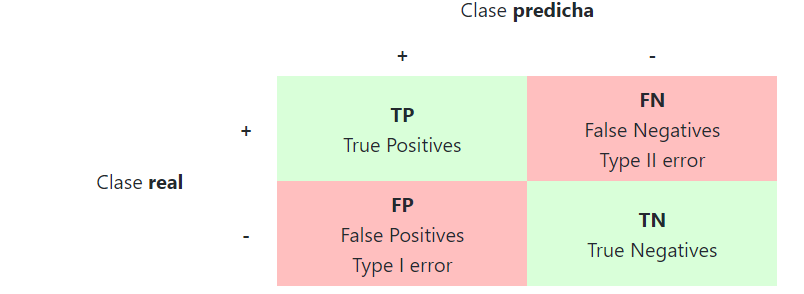

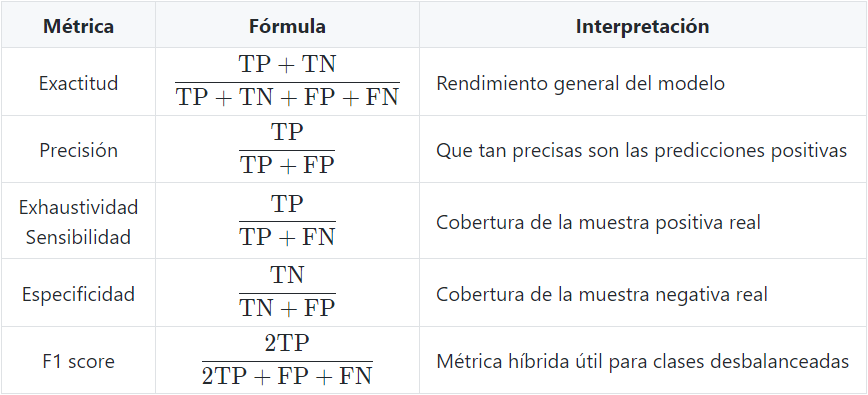

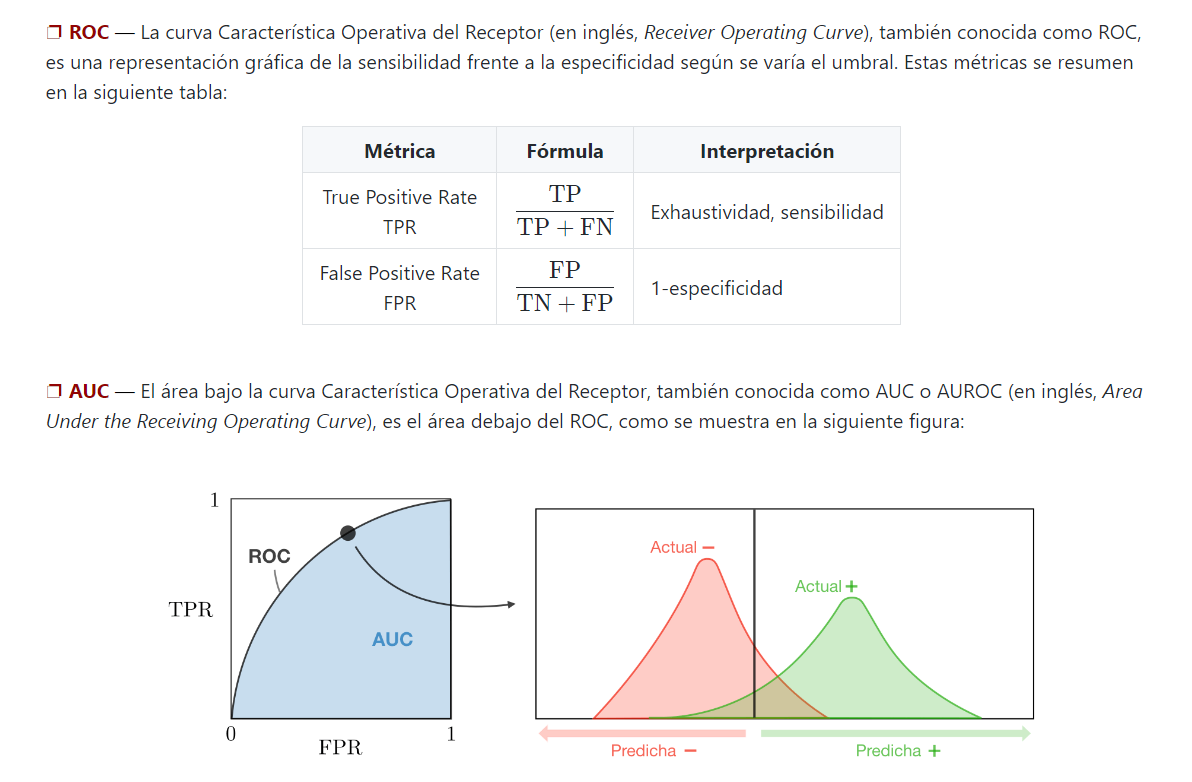

## 11.1.- Accuracy (Exactitud)
### Sesgo de una estimación
### Proximidad entre una predicción y el valor verdadero

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

## 11.2.- Precisión
### Dispersión de resultados en calculos repetitivos 

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

## 11.3.- Sensibilidad
### Predicciones correctas Positivas[verdaderos positivos]
### VP/(VP+FN)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

## 11.4.- Especificidad
### Predicciones correctas Negativas[verdaderos negativos]
### VN/(VN+FP)

## 11.5.- F1-SCORE
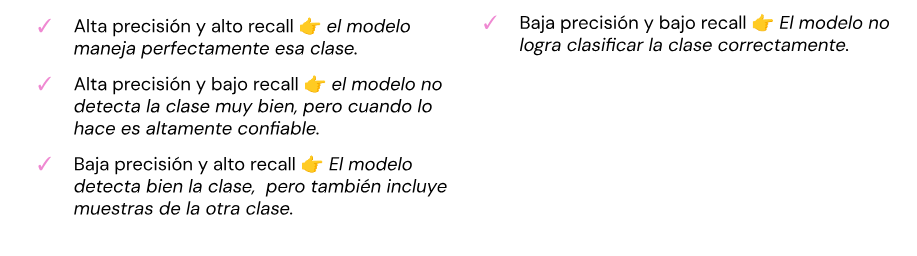

In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

## 11.6.- Resumen de todas las métricas de desempeño del modelo

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))